# Load the libraries and Import the data

In [11]:
#----- Import the libraries and functions that will be used
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection   import train_test_split
from sklearn.metrics   import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model      import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
%matplotlib inline

In [12]:
import os
os.getcwd()

'C:\\Users\\Robert\\Git\\Predictive-Analytics-for-Bank-Marketing'

In [13]:
#----- Import the data into a data frame
bank_file = pd.read_csv("C:/Banking_with_5_Extra.csv")

In [14]:
full_df = DataFrame(bank_file)

In [15]:
#----- Look at the shape of the data
print(full_df.shape)

(41188, 21)


In [16]:
#----- Peek at the first few lines of the data frame to ensure that all columns are loaded
full_df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Look for NULL Values

In [17]:
#----- Check to see if any columns contain null values.
full_df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
target            0
dtype: int64

# Look for Invalid Data

In [18]:
#----- Explore the data types of the features to ensure that they are correct. If not, it could indicate that there are
#----- some invalid values (such as text characters in a feature that should be numerical.)
full_df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
target             object
dtype: object

In [19]:
#----- Look at the minimum values for the numerical features.
#----- This will highlight anomalies such as values that illogically contain negative numbers (eg: duration = -45).
print(full_df.min())

age                     17
job                 admin.
marital           divorced
education         basic.4y
default                 no
housing                 no
loan                    no
contact           cellular
month                  apr
day_of_week            fri
duration                 0
campaign                 1
pdays                    0
previous                 0
poutcome           failure
emp_var_rate          -3.4
cons_price_idx      92.201
cons_conf_idx        -50.8
euribor3m            0.634
nr_employed         4963.6
target                  no
dtype: object


In [20]:
#----- Look at the maximum values for the numerical features.
#----- This will highlight anomalies such as values that are exorbitantly high (eg: age = 205).
print(full_df.max())

age                      98
job                 unknown
marital             unknown
education           unknown
default                 yes
housing                 yes
loan                    yes
contact           telephone
month                   sep
day_of_week             wed
duration               4918
campaign                 56
pdays                   999
previous                  7
poutcome            success
emp_var_rate            1.4
cons_price_idx       94.767
cons_conf_idx         -26.9
euribor3m             5.045
nr_employed          5228.1
target                  yes
dtype: object


In [21]:
#----- List the distinct values for each categorical feature.
#----- This will highlight invalid values.

In [22]:
print("\nValues for JOB feature:\n-----------------------")
print(full_df.job.value_counts())


Values for JOB feature:
-----------------------
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


In [23]:
print("\nValues for MARITAL feature:\n---------------------------")
print(full_df.marital.value_counts())


Values for MARITAL feature:
---------------------------
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64


In [24]:
print("\nValues for EDUCATION feature:\n-----------------------------")
print(full_df.education.value_counts())


Values for EDUCATION feature:
-----------------------------
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


In [25]:
print("\nValues for DEFAULT feature:\n---------------------------")
print(full_df.default.value_counts())


Values for DEFAULT feature:
---------------------------
no         32588
unknown     8597
yes            3
Name: default, dtype: int64


In [26]:
print("\nValues for HOUSING feature:\n---------------------------")
print(full_df.housing.value_counts())


Values for HOUSING feature:
---------------------------
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64


In [27]:
print("\nValues for LOAN feature:\n------------------------")
print(full_df.loan.value_counts())


Values for LOAN feature:
------------------------
no         33950
yes         6248
unknown      990
Name: loan, dtype: int64


In [28]:
print("\nValues for CONTACT feature:\n---------------------------")
print(full_df.contact.value_counts())


Values for CONTACT feature:
---------------------------
cellular     26144
telephone    15044
Name: contact, dtype: int64


In [29]:
print("\nValues for MONTH feature:\n-------------------------")
print(full_df.month.value_counts())


Values for MONTH feature:
-------------------------
may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64


In [30]:
print("\nValues for DAY_OF_WEEK feature:\n-------------------------------")
print(full_df.day_of_week.value_counts())


Values for DAY_OF_WEEK feature:
-------------------------------
thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64


In [31]:
print("\nValues for POUTCOME feature:\n----------------------------")
print(full_df.poutcome.value_counts())


Values for POUTCOME feature:
----------------------------
nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64


In [32]:
print("\nValues for TARGET feature:\n--------------------------")
print(full_df.target.value_counts())


Values for TARGET feature:
--------------------------
no     36548
yes     4640
Name: target, dtype: int64


# Explore the Values for the TARGET Variable

Text(0,0.5,'Number of Observations')

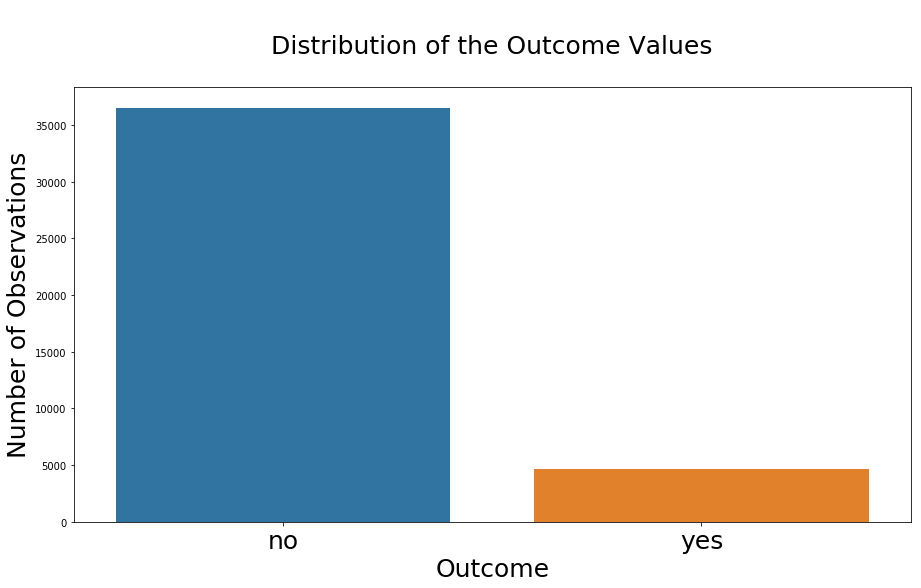

In [33]:
#----- Create a histogram to show the distribution of the TARGET values
plt.figure(figsize=(15,8))
ax = sns.countplot(x="target", data=full_df)
plt.title('\nDistribution of the Outcome Values\n',size=25)
plt.xlabel('Outcome',size=25)
plt.xticks(size=25)
plt.ylabel('Number of Observations',size=25)

In [34]:
#----- Display the counts for each outcome value
print(full_df.target.value_counts())

no     36548
yes     4640
Name: target, dtype: int64


In [35]:
#----- Display the proportional amount of each outcome value
print(full_df.groupby(['target']).size() / len(full_df) * 100)

target
no     88.734583
yes    11.265417
dtype: float64


# Calculate Interquartile Range (IQR) to Determine Outliers

In [36]:
#----- Calculate the IQR value for each column
Q1 = full_df.quantile(0.25)
Q3 = full_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age                15.000
duration          217.000
campaign            2.000
pdays               0.000
previous            0.000
emp_var_rate        3.200
cons_price_idx      0.919
cons_conf_idx       6.300
euribor3m           3.617
nr_employed       129.000
dtype: float64


In [37]:
#----- Calculate the lower limit to determine lower outliers.
#----- These values will be used in later steps when the numerical features are explored.
print(Q1 -  1.5 * IQR)

age                  9.5000
duration          -223.5000
campaign            -2.0000
pdays              999.0000
previous             0.0000
emp_var_rate        -6.6000
cons_price_idx      91.6965
cons_conf_idx      -52.1500
euribor3m           -4.0815
nr_employed       4905.6000
dtype: float64


In [38]:
#----- Calculate the upper limit to determine upper outliers.
#----- These values will be used in later steps when the numerical features are explored.
print(Q3 +  1.5 * IQR)

age                 69.5000
duration           644.5000
campaign             6.0000
pdays              999.0000
previous             0.0000
emp_var_rate         6.2000
cons_price_idx      95.3725
cons_conf_idx      -26.9500
euribor3m           10.3865
nr_employed       5421.6000
dtype: float64


# Explore the Numerical Variables

# Explore the Values for the AGE Feature

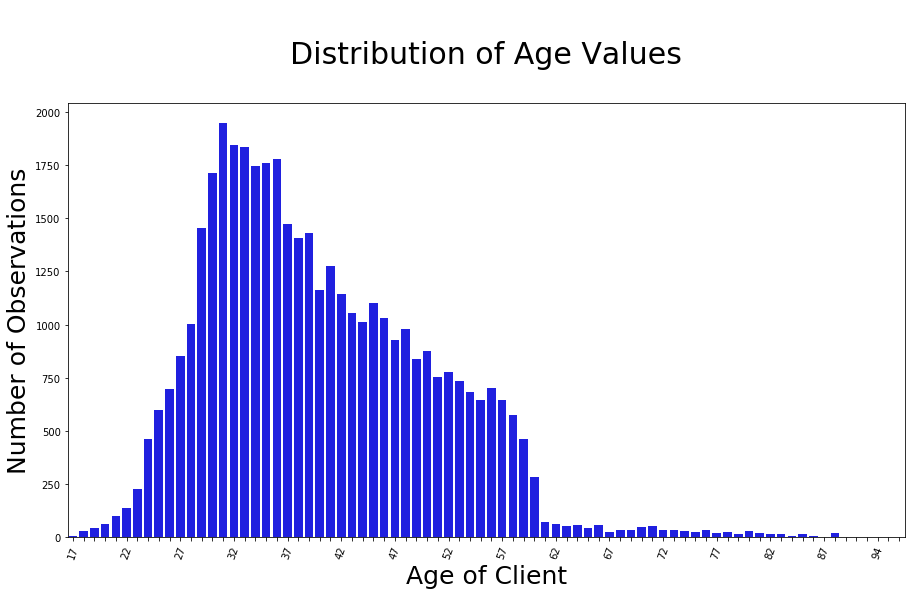

In [39]:
#----- Create a histogram to show the distribution of the AGE values
plt.figure(figsize=(15,8))
ax = sns.countplot(x="age", data=full_df, color = 'Blue')
plt.title('\nDistribution of Age Values\n',size=30)
plt.xlabel('Age of Client',size=25)
plt.xticks(rotation=70)
plt.ylabel('Number of Observations',size=25)

# For readability, only display every 5th tick on the X-axis.
for index, label in enumerate(ax.xaxis.get_ticklabels()):
   if index % 5 != 0:
     label.set_visible(False)

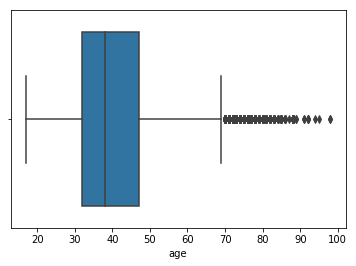

In [40]:
#----- Use a Boxplot to display outliers in the AGE column
sns.boxplot(x=full_df['age'])

In [41]:
#----- Count the number of outliers for the AGE attribute (ie: age < 10 or age > 69)
print(full_df.age[full_df.age < 10].count())
print(full_df.age[full_df.age > 69].count())

0
469


In [42]:
#----- What proportion of the AGE values are outliers?
print(469 / 41188 * 100)

1.1386811692726035


In [43]:
#----- How many of the AGE outliers have a target value of 'yes'?
full_df.loc[full_df['age'] > 69, 'target'].value_counts()

no     248
yes    221
Name: target, dtype: int64

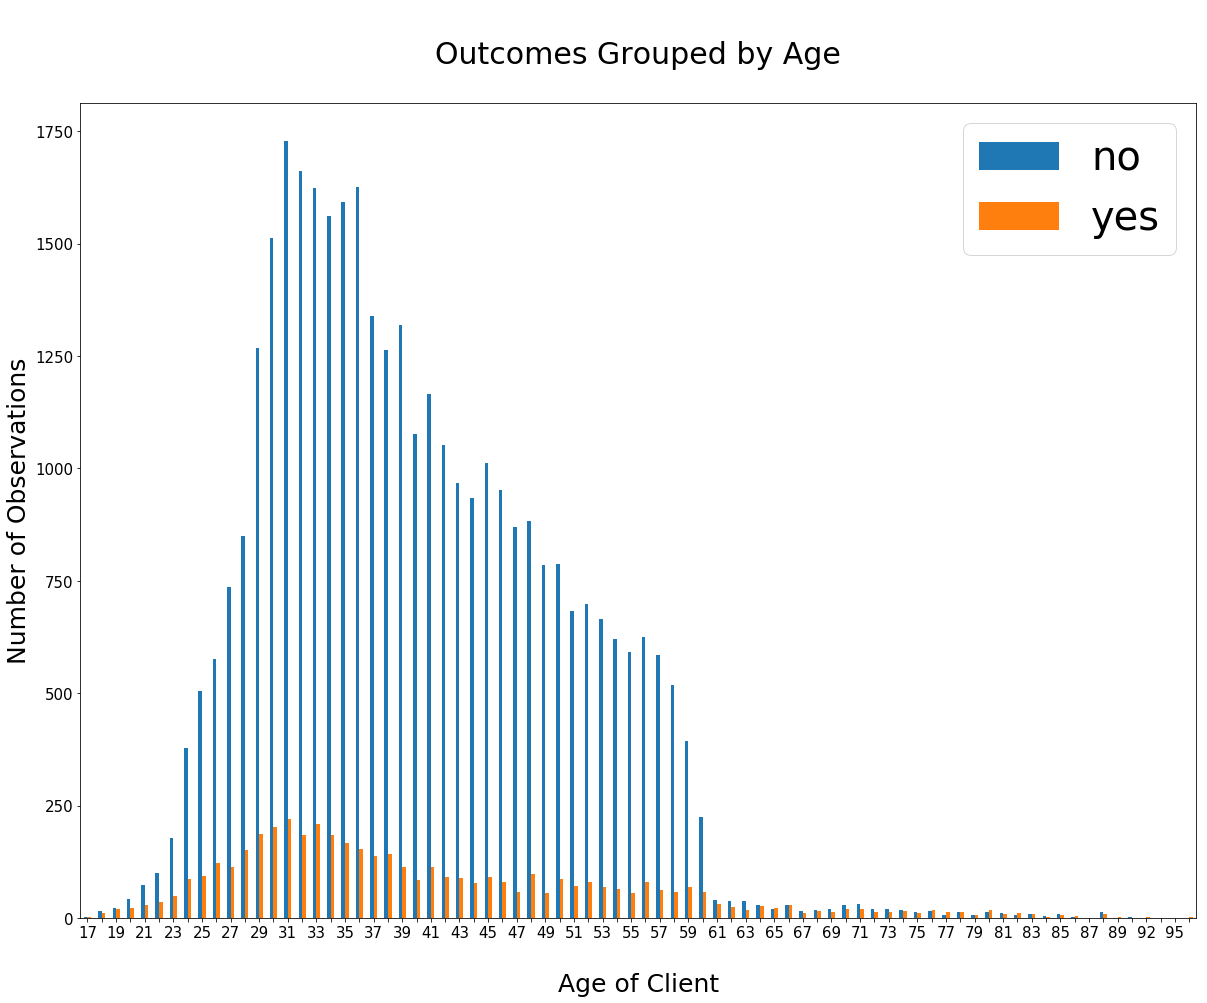

In [44]:
#----- Create a histogram showing relationship between AGE and target variable
temp_df = pd.crosstab(full_df['age'].sort_values(), full_df['target'])
ax = temp_df.plot(kind='bar',fontsize=15,figsize=[20,15])
ax.set_title('\nOutcomes Grouped by Age\n', fontsize='30') 
ax.set_xlabel('\nAge of Client', fontsize='25')
ax.set_ylabel('Number of Observations', fontsize='25')
ax.legend(fontsize='40')
plt.xticks(rotation=0)

# For readability, only display every 2nd tick on the X-axis.
for index, label in enumerate(ax.xaxis.get_ticklabels()):
   if index % 2 != 0:
     label.set_visible(False)

# Explore the Values for the DURATION Feature

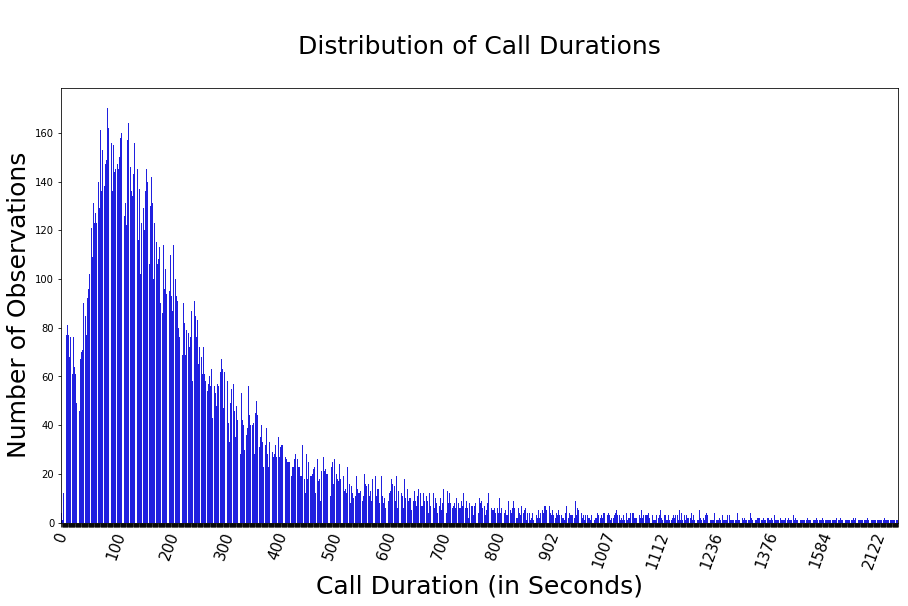

In [45]:
#----- Create a histogram to show the distribution of the DURATION values
plt.figure(figsize=(15,8))
ax = sns.countplot(x="duration", data=full_df, color = 'Blue')
plt.title('\nDistribution of Call Durations\n',size=25)
plt.xlabel('Call Duration (in Seconds)',size=25)
plt.ylabel('Number of Observations',size=25)
plt.xticks(rotation=70)
plt.xticks(size=15)

# For readability, only display every 100th tick on the X-axix.
for index, label in enumerate(ax.xaxis.get_ticklabels()):
   if index % 100 != 0:
     label.set_visible(False)

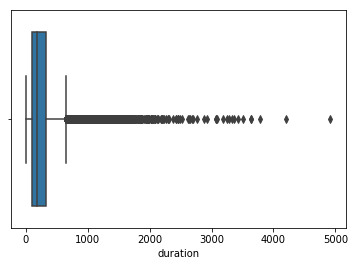

In [46]:
#----- Use a Boxplot to display outliers in the DURATION column
sns.boxplot(x=full_df['duration'])

In [47]:
#----- Count the number of outliers for the DURATION attribute (ie: duration <-223.5 or age > 644.5)
print(full_df. duration [full_df.duration < -223.5].count())
print(full_df. duration [full_df.duration > 644.5].count())

0
2963


In [48]:
#----- What proportion of the DURATION values are outliers?
print(2963 / 41188 * 100)

7.193842866854423


In [49]:
#----- How many of the DURATION outliers have a target value of 'yes'?
full_df.loc[full_df['duration'] > 644.5, 'target'].value_counts()

yes    1526
no     1437
Name: target, dtype: int64

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.]),
 <a list of 8 Text xticklabel objects>)

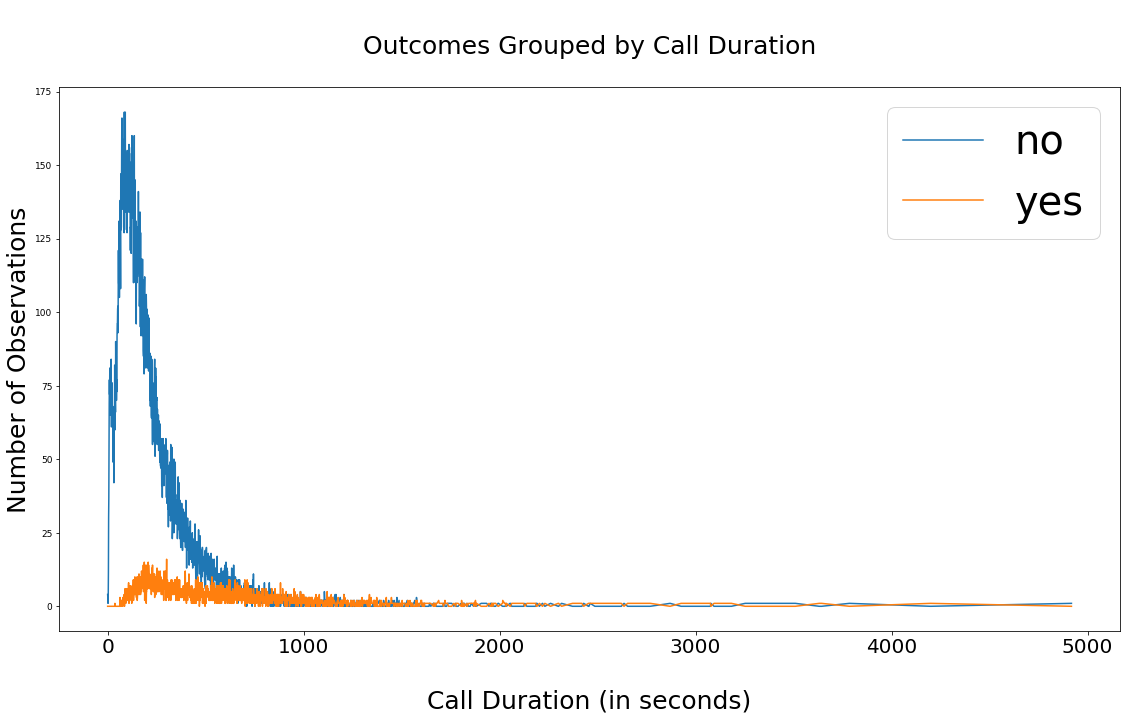

In [50]:
#----- Create a histogram showing relationship between DURATION and target variable
temp_df = pd.crosstab(full_df['duration'].sort_values(), full_df['target'])
ax = temp_df.plot(fontsize=9,figsize=[19,10])
ax.set_title('\nOutcomes Grouped by Call Duration\n', fontsize='25') 
ax.set_xlabel('\nCall Duration (in seconds)', fontsize='25')
ax.set_ylabel('Number of Observations', fontsize='25')
ax.legend(fontsize='40')
plt.xticks(size=20)

# Explore the Values for the CAMPAIGN Feature

Text(0,0.5,'Number of Observations')

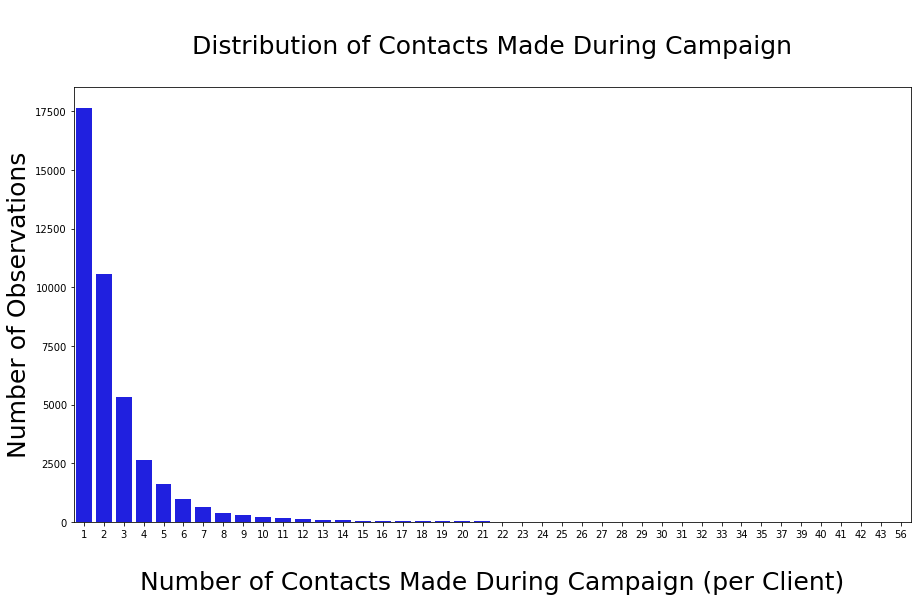

In [51]:
#----- Create a histogram to show the distribution of the CAMPAIGN values
plt.figure(figsize=(15,8))
ax = sns.countplot(x="campaign", data=full_df, color = 'Blue')
plt.title('\nDistribution of Contacts Made During Campaign\n',size=25)
plt.xlabel('\nNumber of Contacts Made During Campaign (per Client)',size=25)
plt.ylabel('Number of Observations',size=25)

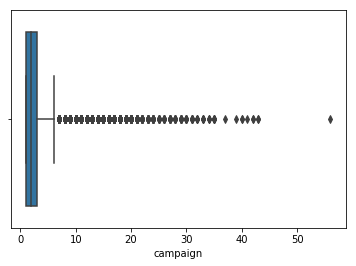

In [52]:
#----- Use a Boxplot to display outliers in the CAMPAIGN column
sns.boxplot(x=full_df['campaign'])

In [53]:
#----- Count the number of outliers for the CAMPAIGN attribute (ie: campaign < -2 or age > 6)
print(full_df.campaign [full_df.campaign < -2].count())
print(full_df.campaign [full_df.campaign > 6].count())

0
2406


In [54]:
#----- What proportion of the CAMPAIGN values are outliers?
print(2406 / 41188 * 100)

5.8415072351170245


In [55]:
#----- How many of the CAMPAIGN outliers have a target value of 'yes'?
full_df.loc[full_df['campaign'] > 6, 'target'].value_counts()

no     2295
yes     111
Name: target, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text xticklabel objects>)

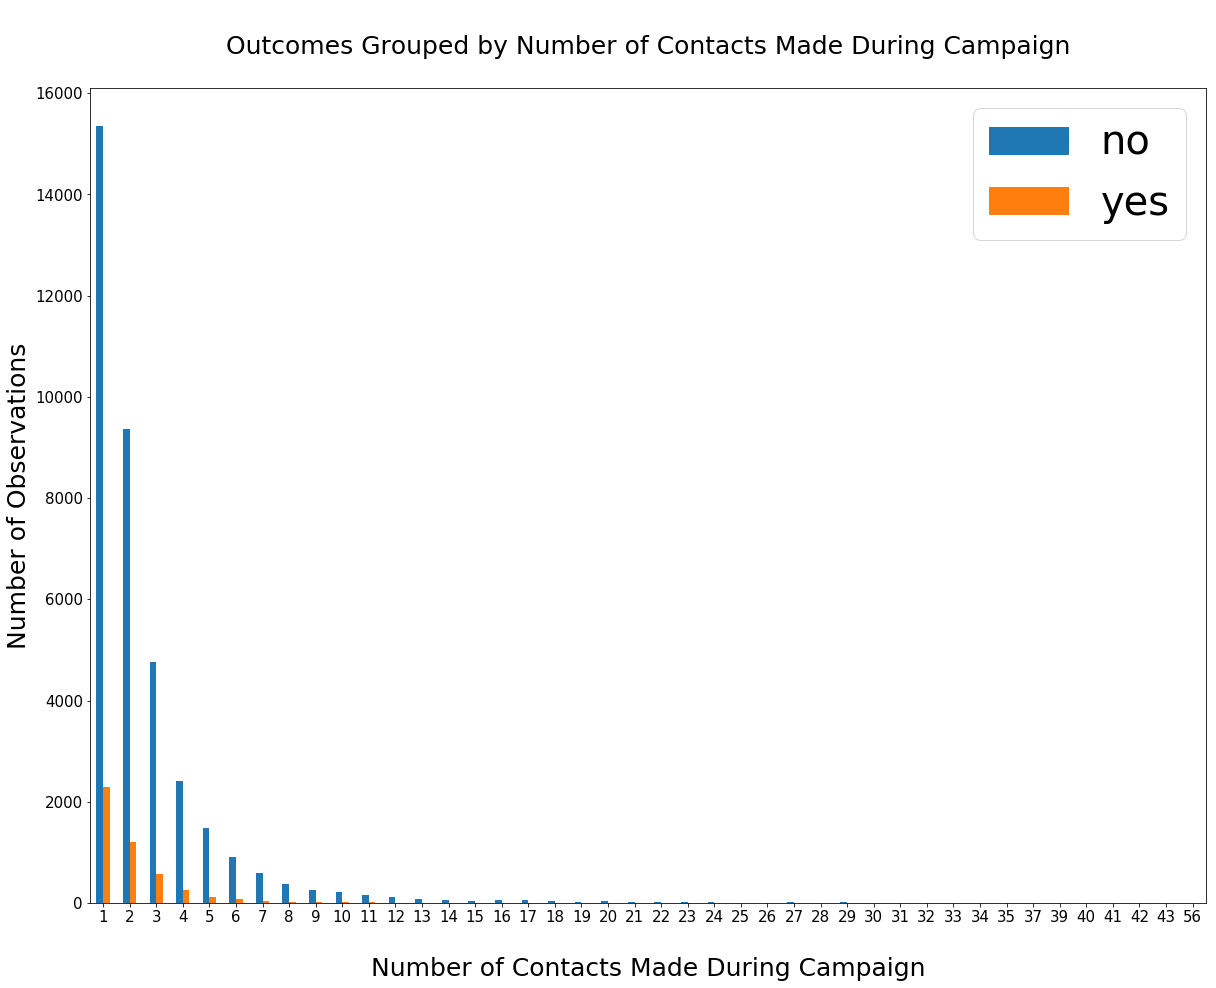

In [56]:
#----- Create a histogram showing relationship between CAMPAIGN and target variable
temp_df = pd.crosstab(full_df['campaign'].sort_values(), full_df['target'])
ax = temp_df.plot(kind='bar',fontsize=15,figsize=[20,15])
ax.set_title('\nOutcomes Grouped by Number of Contacts Made During Campaign\n', fontsize='25') 
ax.set_xlabel('\nNumber of Contacts Made During Campaign', fontsize='25')
ax.set_ylabel('Number of Observations', fontsize='25')
ax.legend(fontsize='40')
plt.xticks(rotation=0)

# Explore the Values for the PDAYS Feature

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text xticklabel objects>)

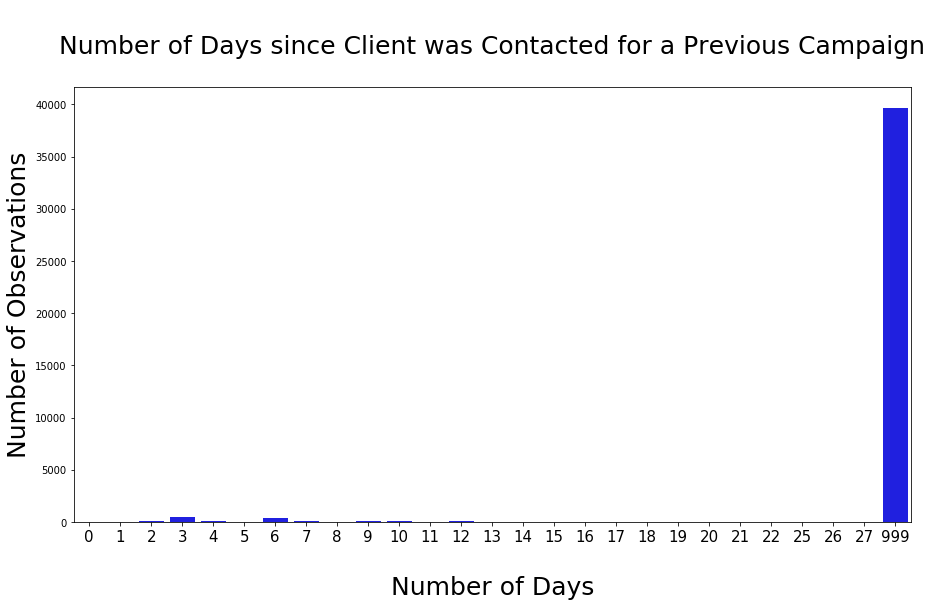

In [57]:
#----- Create a histogram to show the distribution of the PDAYS values
plt.figure(figsize=(15,8))
ax = sns.countplot(x="pdays", data=full_df, color = 'Blue')
plt.title('\nNumber of Days since Client was Contacted for a Previous Campaign\n',size=25)
plt.xlabel('\nNumber of Days',size=25)
plt.ylabel('Number of Observations',size=25)
plt.xticks(size=15)

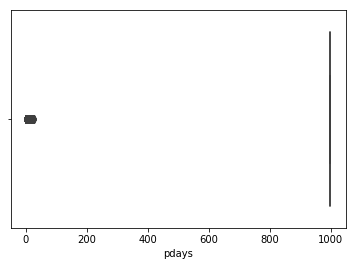

In [58]:
#----- Use a Boxplot to display outliers in the PDAYS column
sns.boxplot(x=full_df['pdays'])

In [59]:
#----- Count the number of outliers for the PDAYS attribute (ie: pdays != 999)
print(full_df.pdays [full_df.pdays != 999].count())
print(full_df.pdays [full_df.pdays == 999].count())

1515
39673


In [60]:
#----- What proportion of the PDAYS values have values that are not '999'?
print(1515 / 41188 * 100)

3.6782558026609693


In [61]:
#----- How many of the PDAYS outliers have a target value of 'yes'?
full_df.loc[full_df['pdays'] != 999, 'target'].value_counts()

yes    967
no     548
Name: target, dtype: int64

# Explore the Values for the PREVIOUS Feature

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

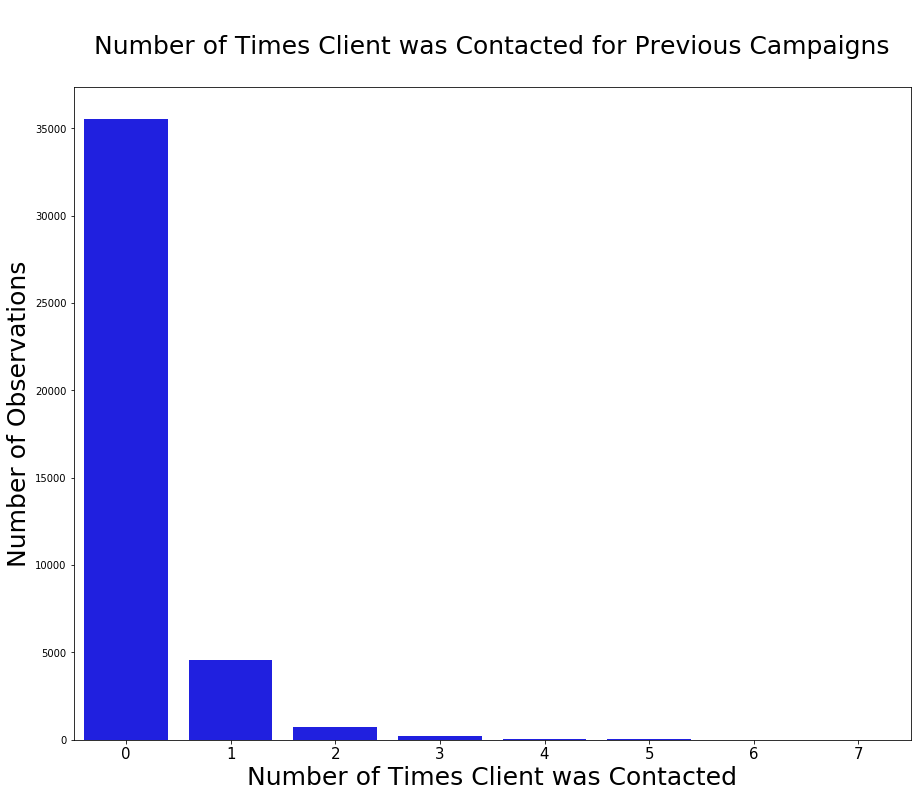

In [62]:
#----- Create a histogram to show the distribution of the PREVIOUS values
plt.figure(figsize=(15,12))
ax = sns.countplot(x="previous", data=full_df, color = 'Blue')
plt.title('\nNumber of Times Client was Contacted for Previous Campaigns\n',size=25)
plt.xlabel('Number of Times Client was Contacted',size=25)
plt.ylabel('Number of Observations',size=25)
plt.xticks(size=15)

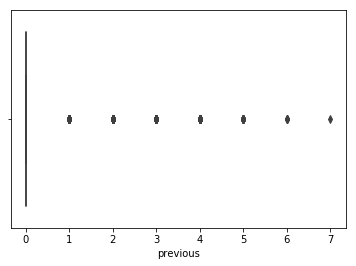

In [63]:
#----- Use a Boxplot to display outliers in the PREVIOUS column
sns.boxplot(x=full_df['previous'])

In [64]:
#----- Count the number of outliers for the PREVIOUS attribute (ie: previous != 0)
print(full_df.campaign [full_df.previous != 0].count())
print(full_df.campaign [full_df.previous == 0].count())

5625
35563


In [65]:
#----- What proportion of the PREVIOUS values have values that are not '0'?
print(5625 / 41188 * 100)

13.65689035641449


In [66]:
#----- How many of the PREVIOUS outliers have a target value of 'yes'?
full_df.loc[full_df['previous'] != 0, 'target'].value_counts()

no     4126
yes    1499
Name: target, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

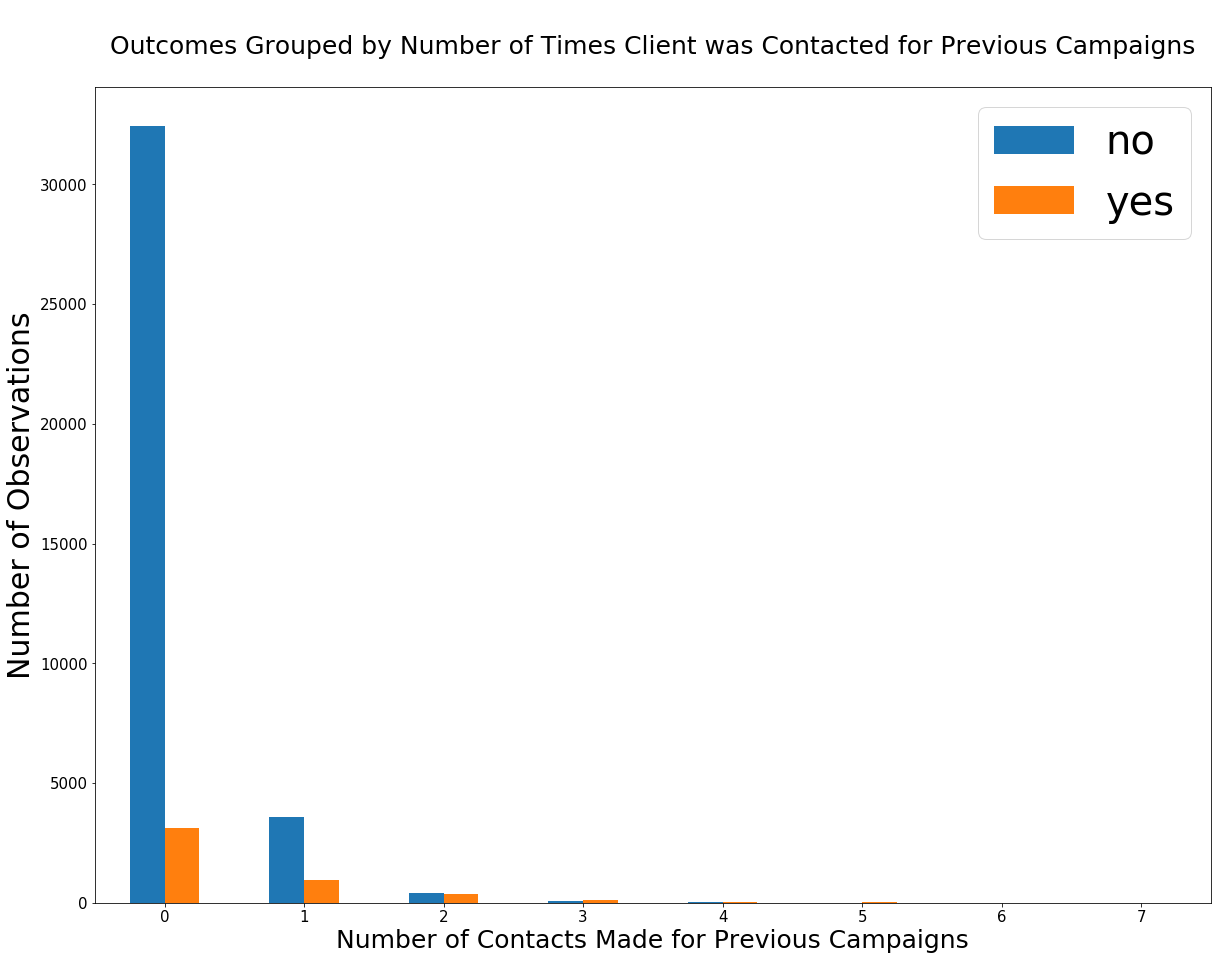

In [67]:
#----- Create a histogram showing relationship between PREVIOUS and target variable
temp_df = pd.crosstab(full_df['previous'].sort_values(), full_df['target'])
ax = temp_df.plot(kind='bar',fontsize=15,figsize=[20,15])
ax.set_title('\nOutcomes Grouped by Number of Times Client was Contacted for Previous Campaigns\n',
             fontsize='25') 
ax.set_xlabel('Number of Contacts Made for Previous Campaigns', fontsize='25')
ax.set_ylabel('Number of Observations', fontsize='30')
ax.legend(fontsize='40')
plt.xticks(size=15)
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

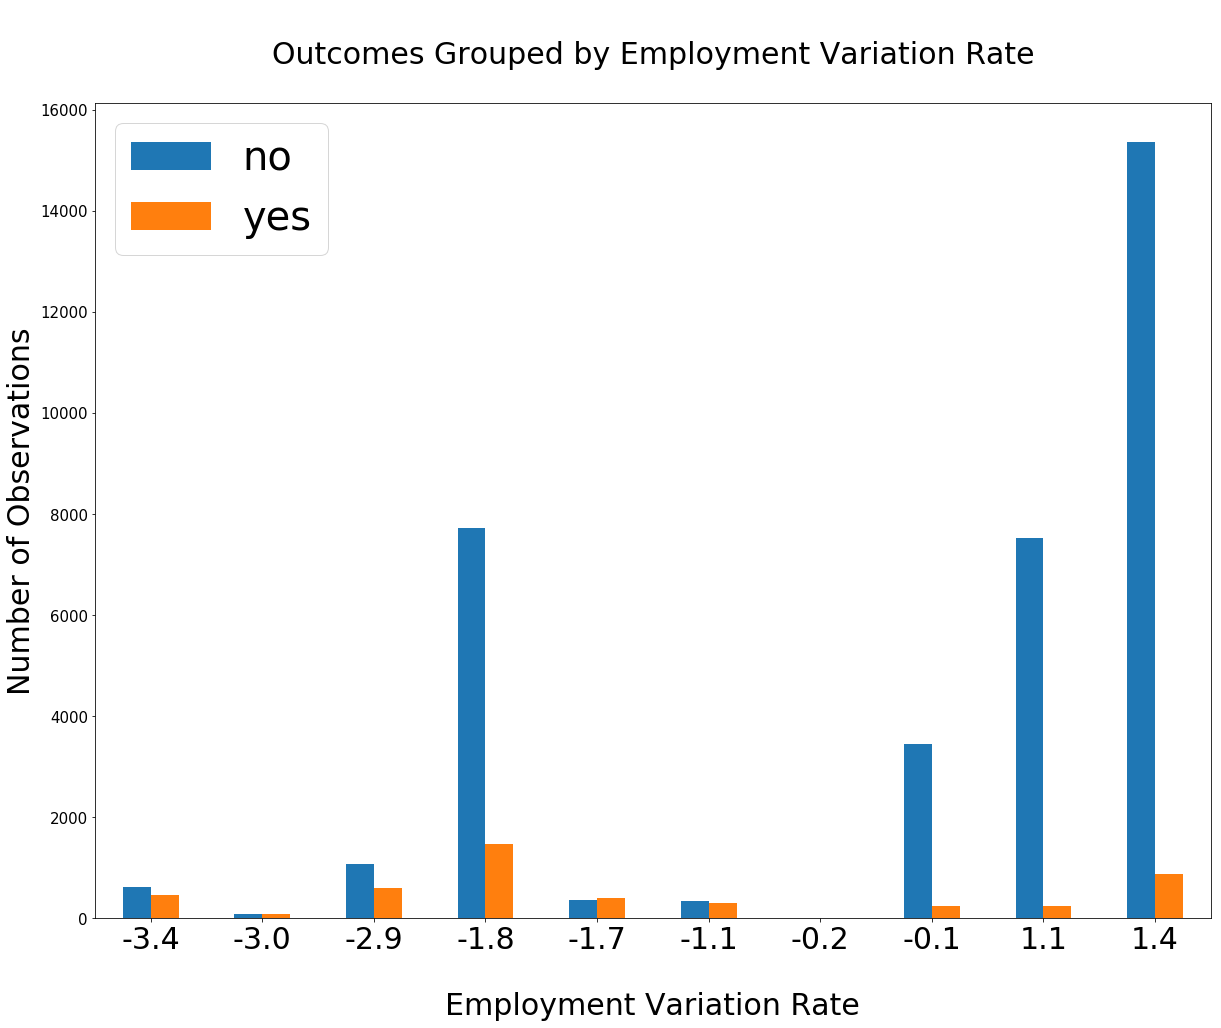

In [68]:
#----- Create a histogram showing relationship between EMP_VAR_RATE and target variable
temp_df = pd.crosstab(full_df['emp_var_rate'].sort_values(), full_df['target'])
ax = temp_df.plot(kind='bar',fontsize=15,figsize=[20,15])
ax.set_title('\nOutcomes Grouped by Employment Variation Rate\n', fontsize='30') 
ax.set_xlabel('\nEmployment Variation Rate', fontsize='30')
ax.set_ylabel('Number of Observations', fontsize='30')
ax.legend(fontsize='40')
plt.xticks(size=30)
plt.xticks(rotation=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

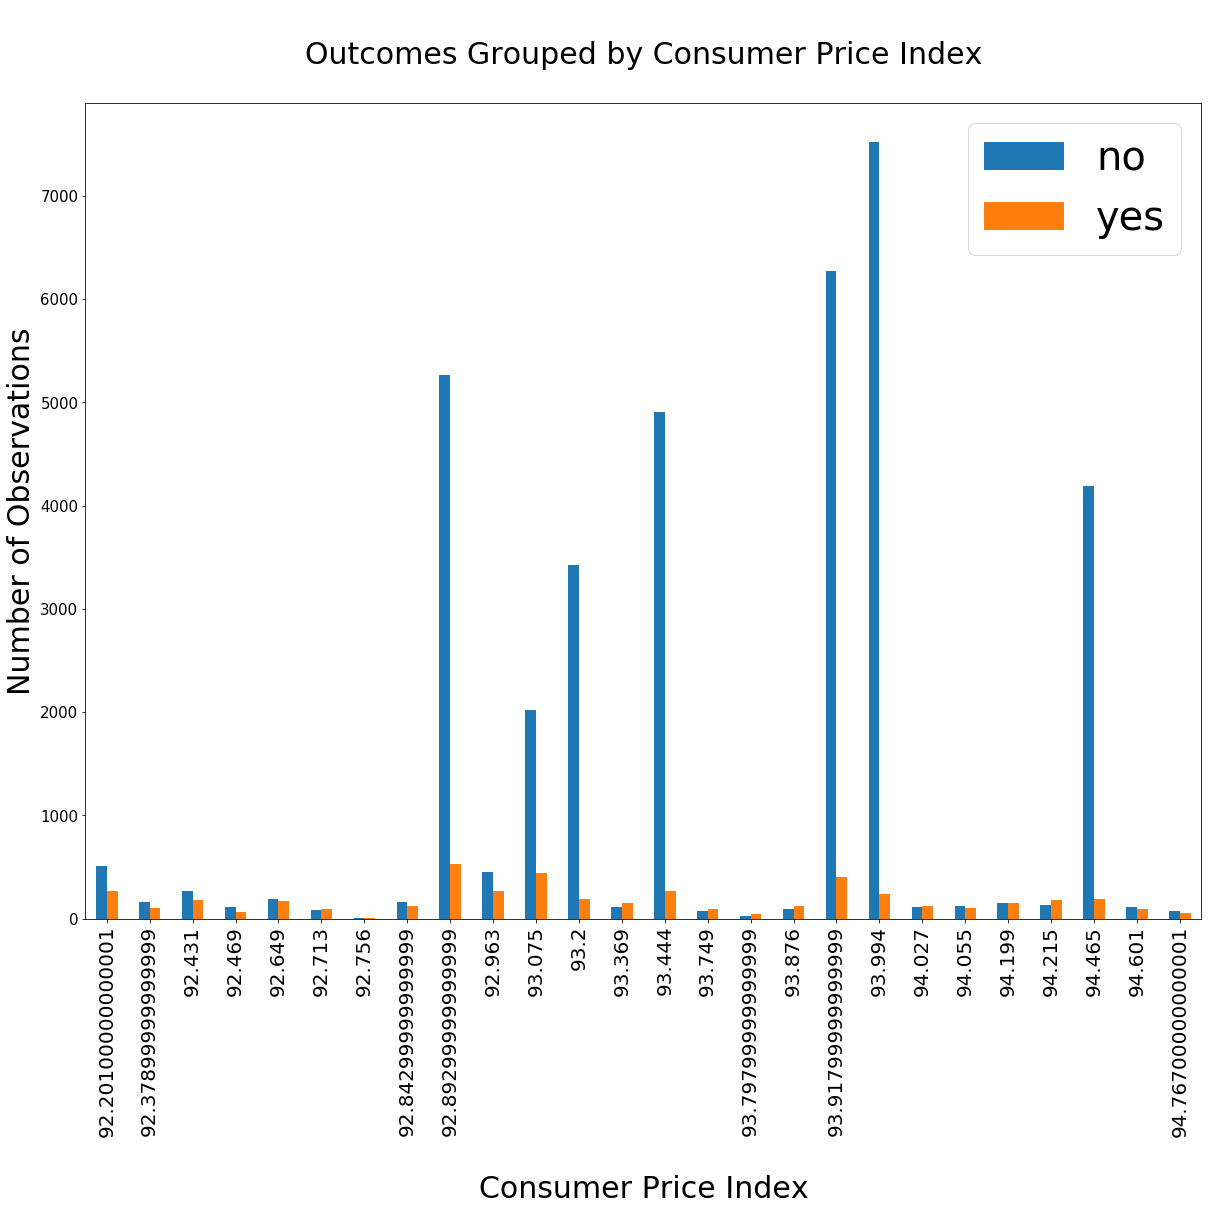

In [69]:
#----- Create a histogram showing relationship between CONS_PRICE_IDX and target variable
temp_df = pd.crosstab(full_df['cons_price_idx'].sort_values(), full_df['target'])
ax = temp_df.plot(kind='bar',fontsize=15,figsize=[20,15])
ax.set_title('\nOutcomes Grouped by Consumer Price Index\n', fontsize='30') 
ax.set_xlabel('\nConsumer Price Index', fontsize='30')
ax.set_ylabel('Number of Observations', fontsize='30')
ax.legend(fontsize='40')
plt.xticks(size=20)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

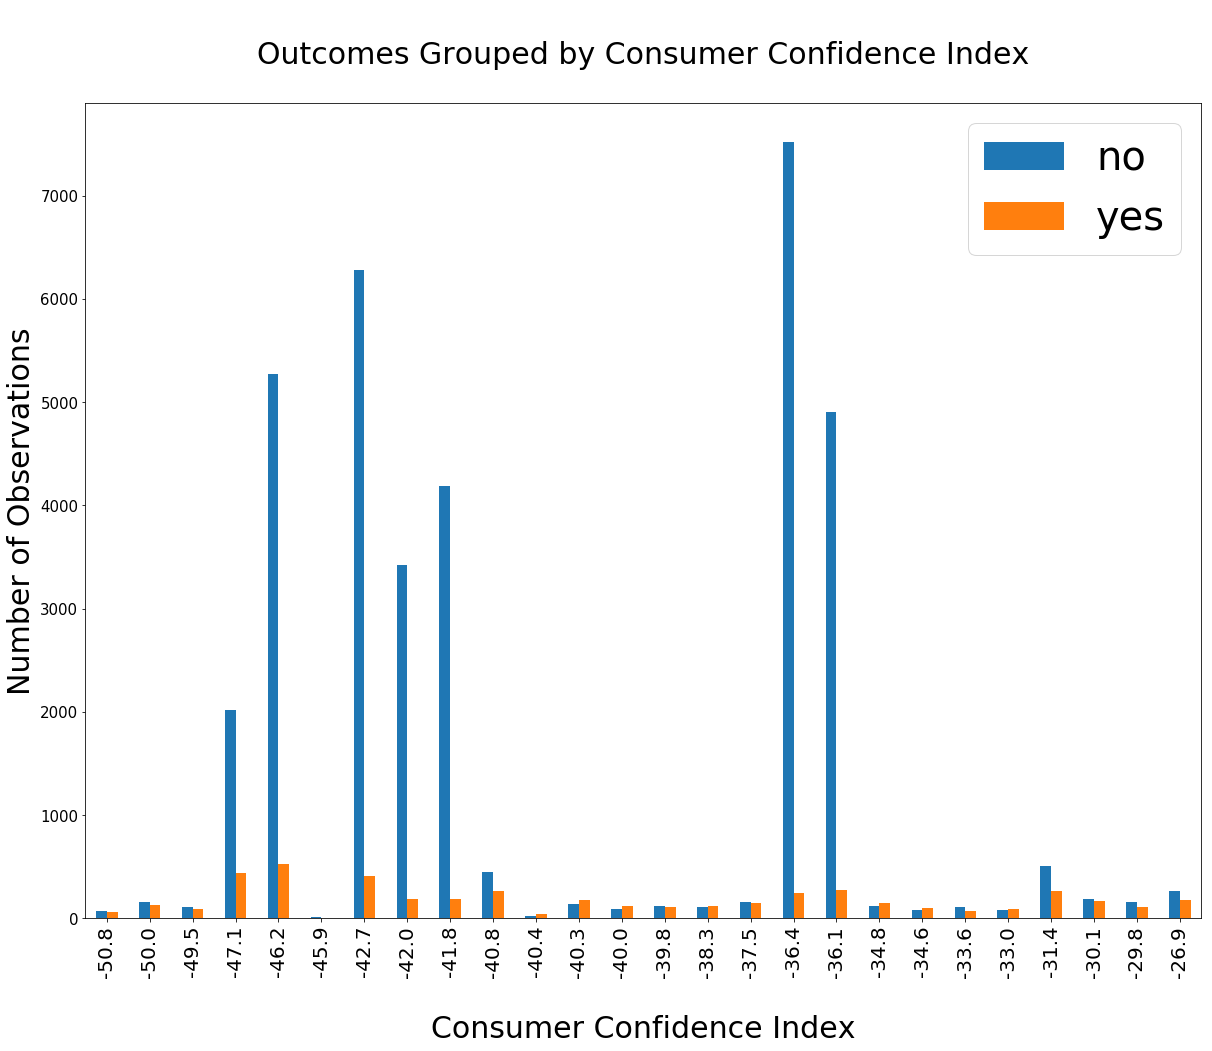

In [70]:
#----- Create a histogram showing relationship between CONS_CONF_IDX and target variable
temp_df = pd.crosstab(full_df['cons_conf_idx'].sort_values(), full_df['target'])
ax = temp_df.plot(kind='bar',fontsize=15,figsize=[20,15])
ax.set_title('\nOutcomes Grouped by Consumer Confidence Index\n', fontsize='30') 
ax.set_xlabel('\nConsumer Confidence Index', fontsize='30')
ax.set_ylabel('Number of Observations', fontsize='30')
ax.legend(fontsize='40')
plt.xticks(size=20)

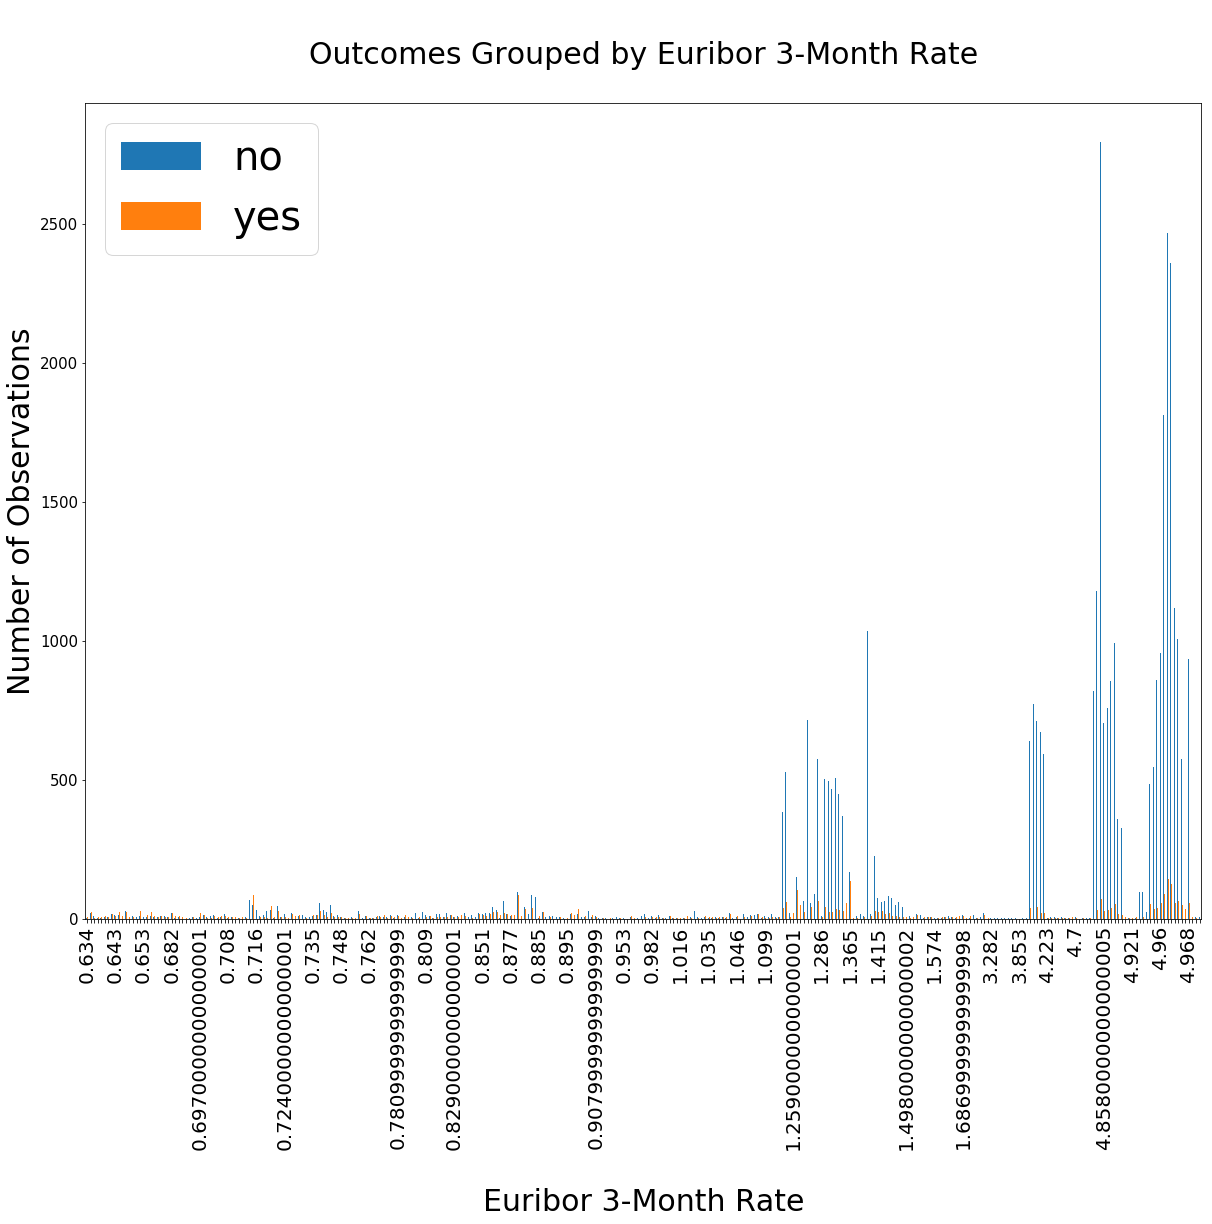

In [71]:
#----- Create a histogram showing relationship between EURIBOR3M and target variable
temp_df = pd.crosstab(full_df['euribor3m'].sort_values(), full_df['target'])
ax = temp_df.plot(kind='bar',fontsize=15,figsize=[20,15])
ax.set_title('\nOutcomes Grouped by Euribor 3-Month Rate\n', fontsize='30') 
ax.set_xlabel('\nEuribor 3-Month Rate', fontsize='30')
ax.set_ylabel('Number of Observations', fontsize='30')
ax.legend(fontsize='40')
plt.xticks(size=20)

# For readability, only display every 8th tick on the X-axix.
for index, label in enumerate(ax.xaxis.get_ticklabels()):
   if index % 8 != 0:
     label.set_visible(False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

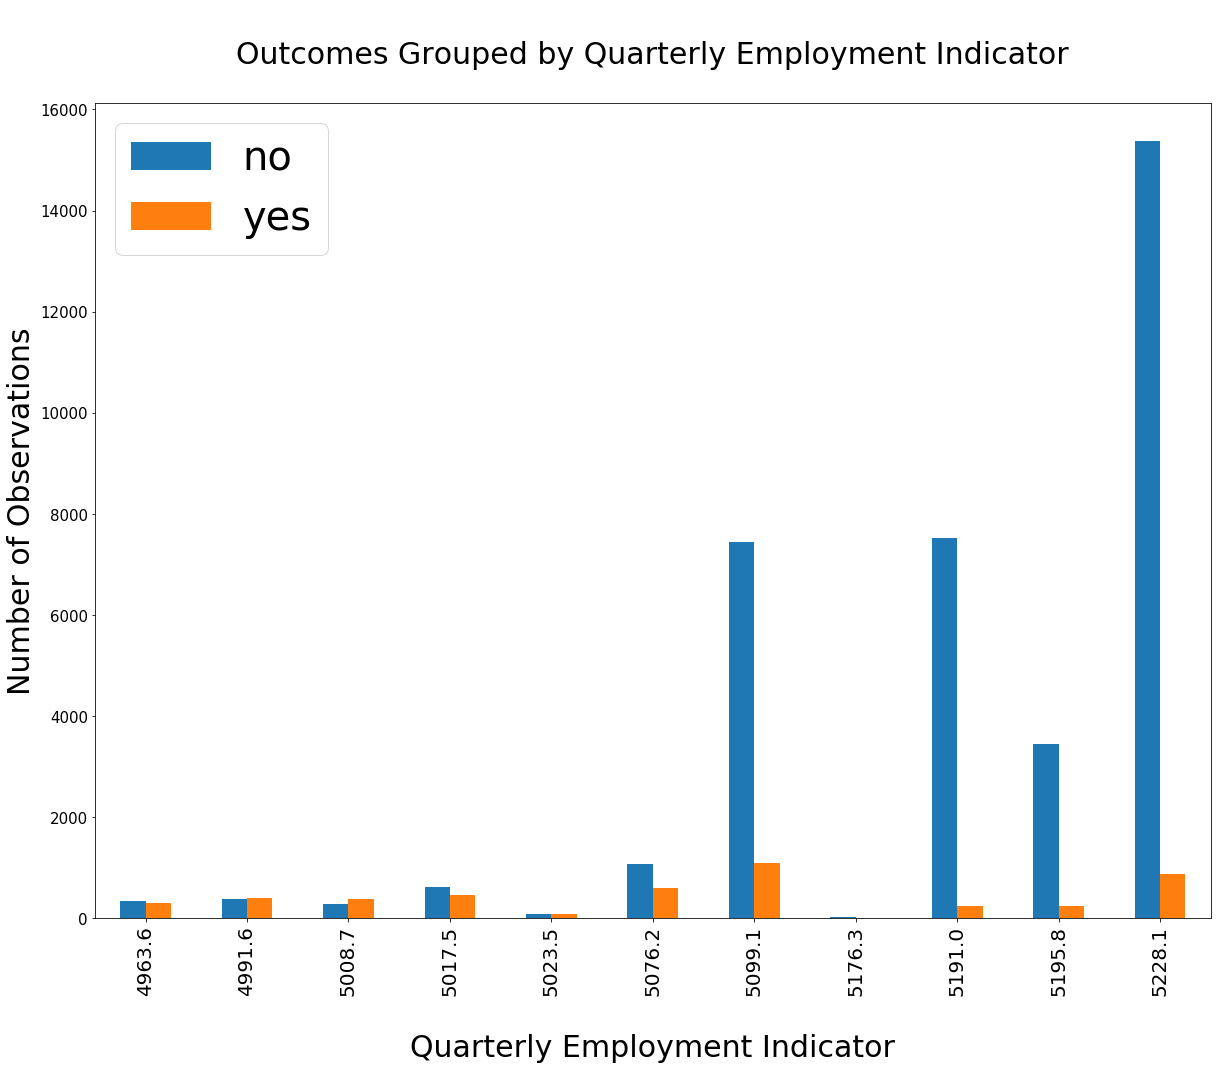

In [72]:
#----- Create a histogram showing relationship between NR_EMPLOYED and target variable
temp_df = pd.crosstab(full_df['nr_employed'].sort_values(), full_df['target'])
ax = temp_df.plot(kind='bar',fontsize=15,figsize=[20,15])
ax.set_title('\nOutcomes Grouped by Quarterly Employment Indicator\n', fontsize='30') 
ax.set_xlabel('\nQuarterly Employment Indicator', fontsize='30')
ax.set_ylabel('Number of Observations', fontsize='30')
ax.legend(fontsize='40')
plt.xticks(size=20)

# Explore the Categorical Features

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

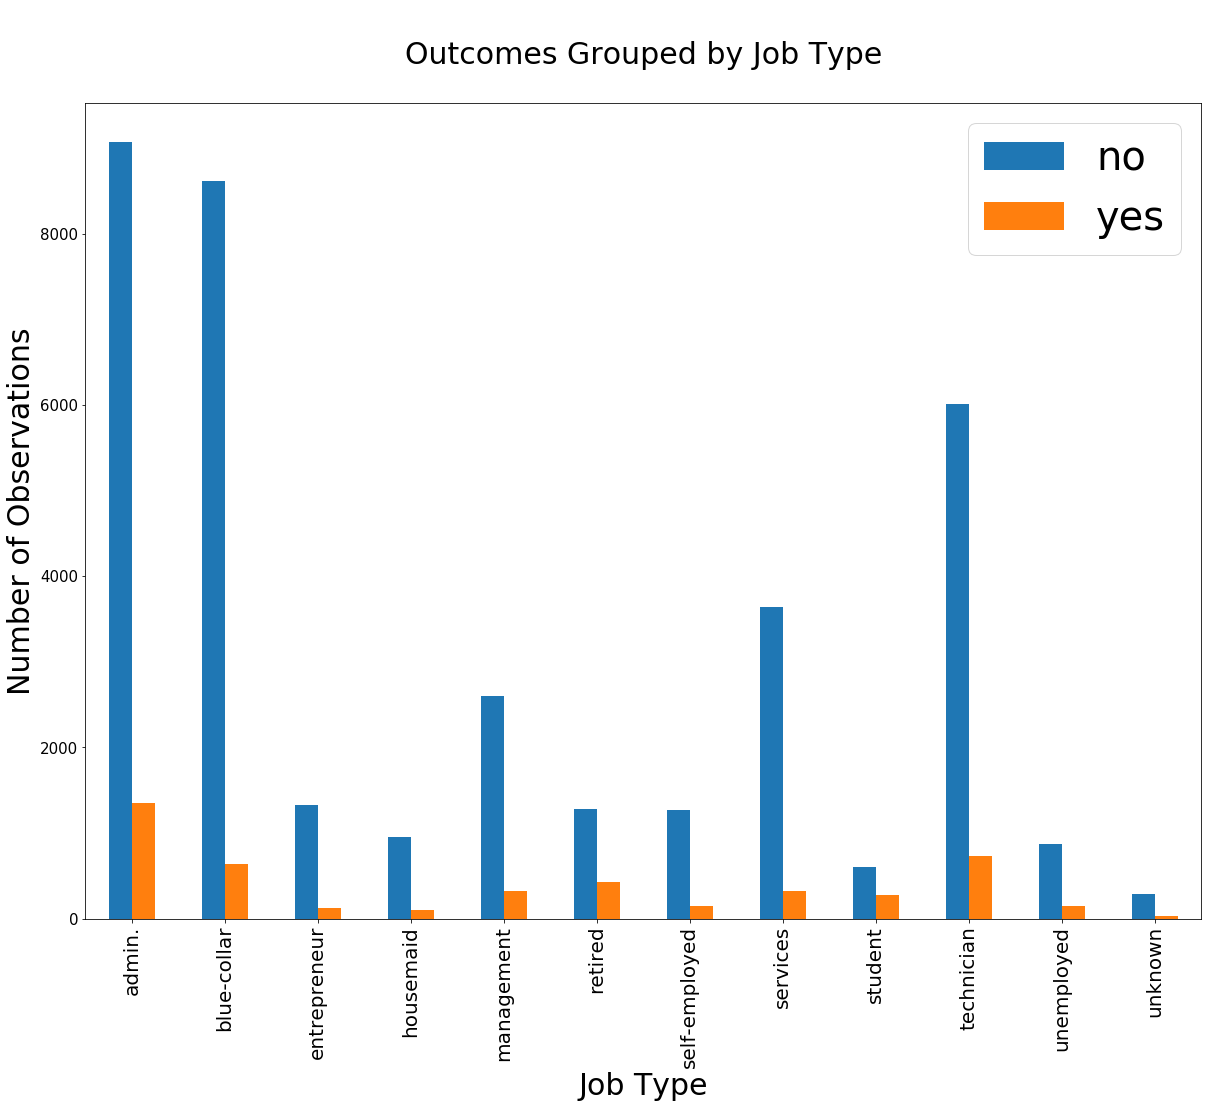

In [73]:
#----- Create a histogram showing relationship between JOB and target variable
temp_df = pd.crosstab(full_df['job'].sort_values(), full_df['target'])
ax = temp_df.plot(kind='bar',fontsize=15,figsize=[20,15])
ax.set_title('\nOutcomes Grouped by Job Type\n', fontsize='30') 
ax.set_xlabel('Job Type', fontsize='30')
ax.set_ylabel('Number of Observations', fontsize='30')
ax.legend(fontsize='40')
plt.xticks(size=20)

In [74]:
# ----- What is the proportion of UNKNOWN value in the JOB feature?
print(full_df.groupby(['job']).size() / len(full_df) * 100)

job
admin.           25.303486
blue-collar      22.467709
entrepreneur      3.535010
housemaid         2.573565
management        7.099155
retired           4.175974
self-employed     3.450034
services          9.636302
student           2.124405
technician       16.371273
unemployed        2.461882
unknown           0.801204
dtype: float64


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

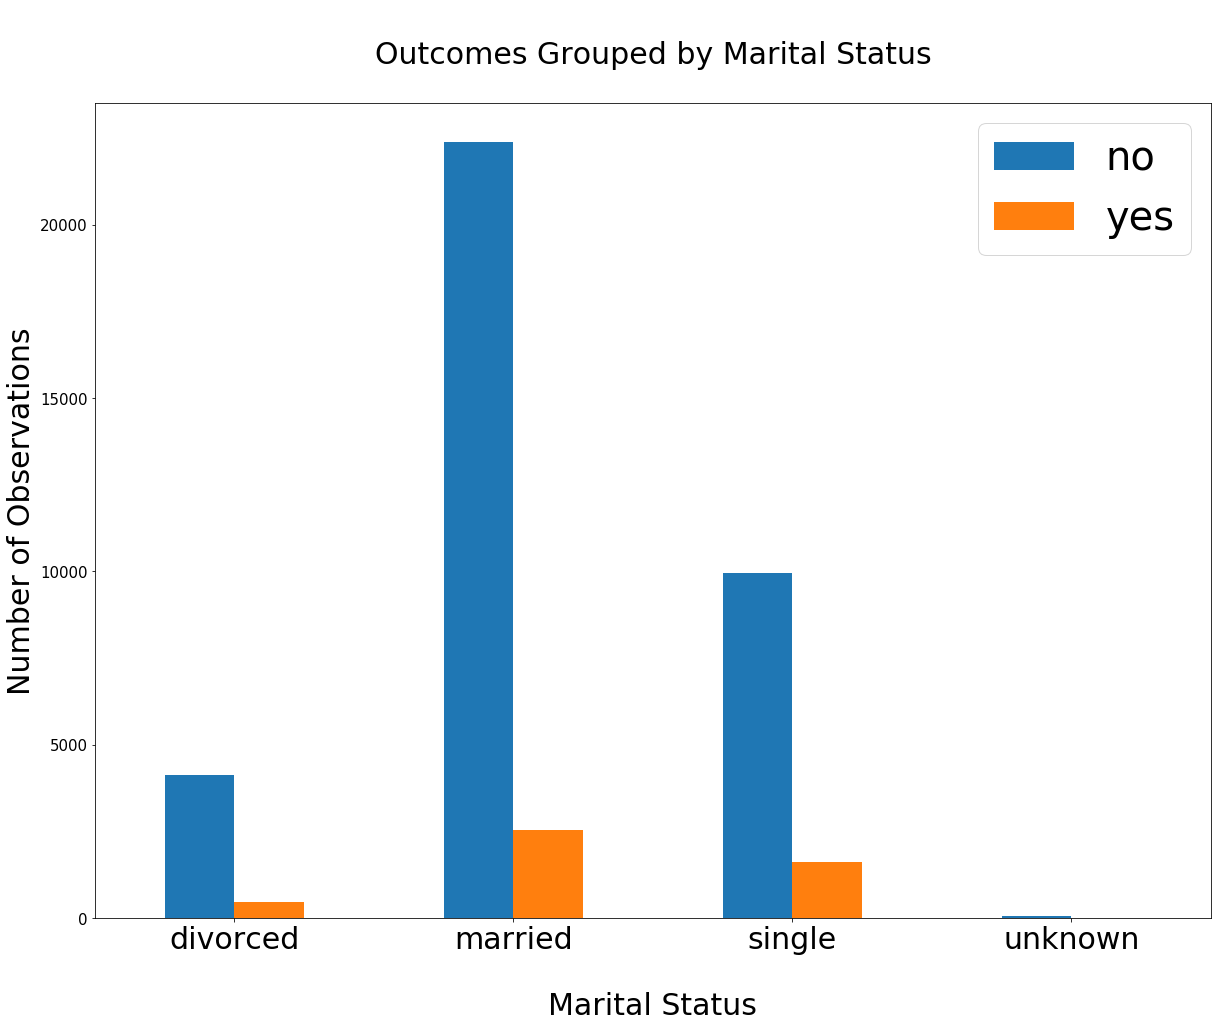

In [75]:
#----- Create a histogram showing relationship between MARITAL and target variable
temp_df = pd.crosstab(full_df['marital'].sort_values(), full_df['target'])
ax = temp_df.plot(kind='bar',fontsize=15,figsize=[20,15])
ax.set_title('\nOutcomes Grouped by Marital Status\n', fontsize='30') 
ax.set_xlabel('\nMarital Status', fontsize='30')
ax.set_ylabel('Number of Observations', fontsize='30')
ax.legend(fontsize='40')
plt.xticks(size=30)
plt.xticks(rotation=0)

In [76]:
#----- What is the proportion of UNKNOWN value in the MARITAL feature?
print(full_df.groupby(['marital']).size() / len(full_df) * 100)

marital
divorced    11.197436
married     60.522482
single      28.085850
unknown      0.194231
dtype: float64


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

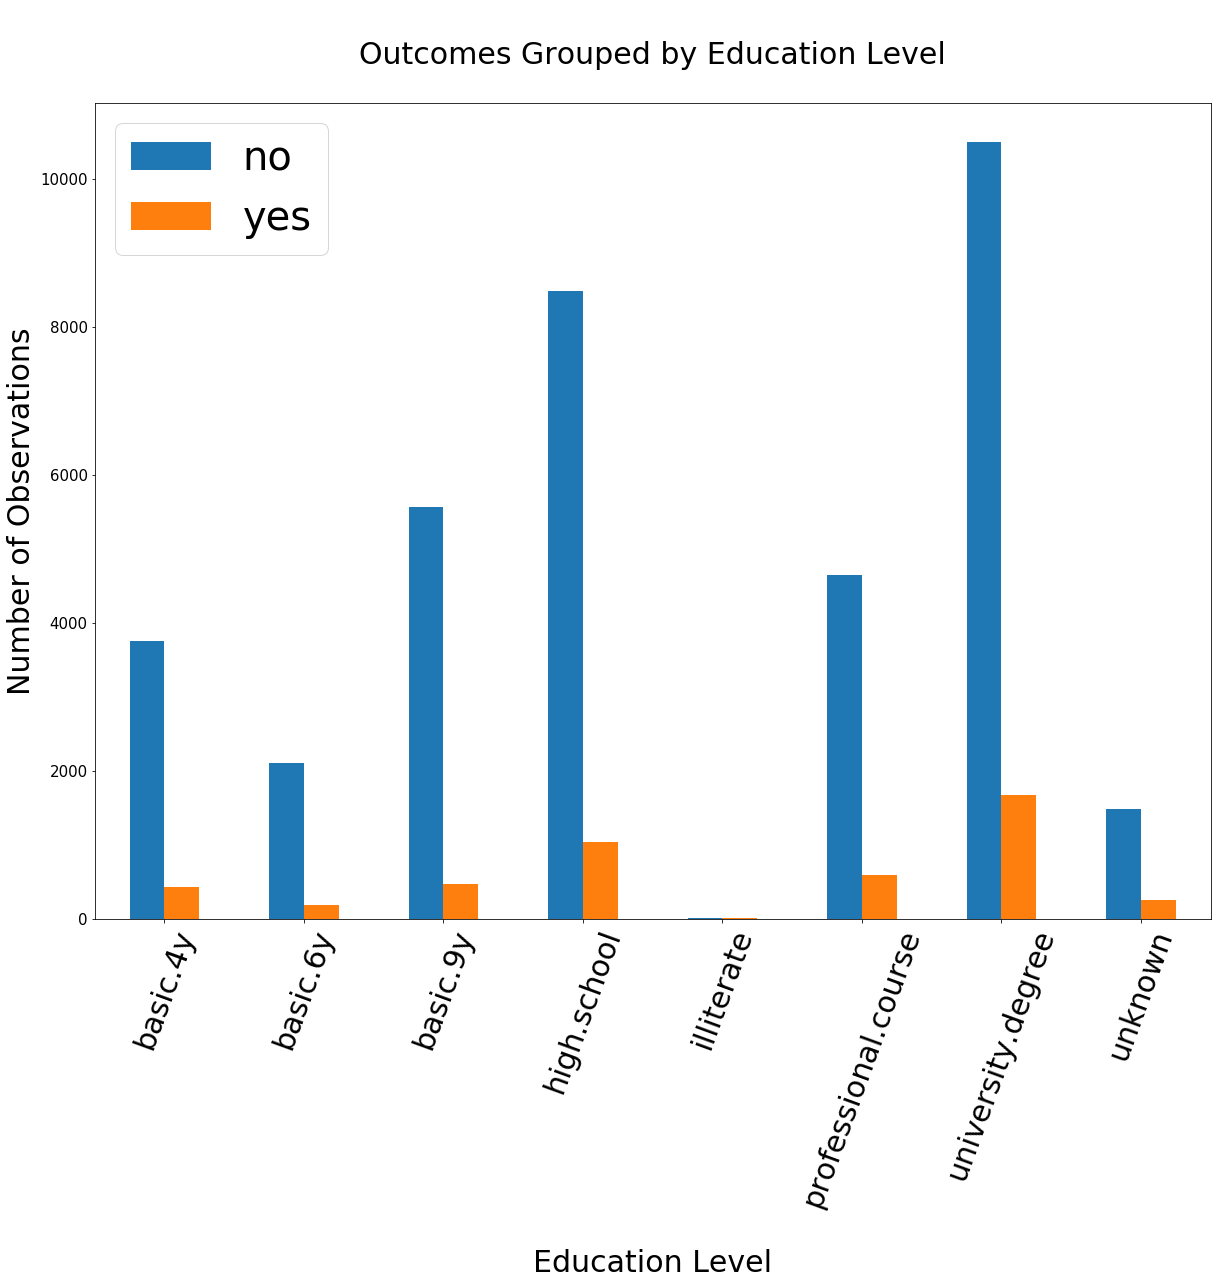

In [77]:
#----- Create a histogram showing relationship between EDUCATION and target variable
temp_df = pd.crosstab(full_df['education'].sort_values(), full_df['target'])
ax = temp_df.plot(kind='bar',fontsize=15,figsize=[20,15])
ax.set_title('\nOutcomes Grouped by Education Level\n', fontsize='30') 
ax.set_xlabel('\nEducation Level', fontsize='30')
ax.set_ylabel('Number of Observations', fontsize='30')
ax.legend(fontsize='40')
plt.xticks(size=30)
plt.xticks(rotation=70)

In [78]:
#----- What is the proportion of UNKNOWN value in the EDUCATION feature?
print(full_df.groupby(['education']).size() / len(full_df) * 100)

education
basic.4y               10.138875
basic.6y                5.564728
basic.9y               14.676605
high.school            23.101389
illiterate              0.043702
professional.course    12.729436
university.degree      29.542585
unknown                 4.202680
dtype: float64


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

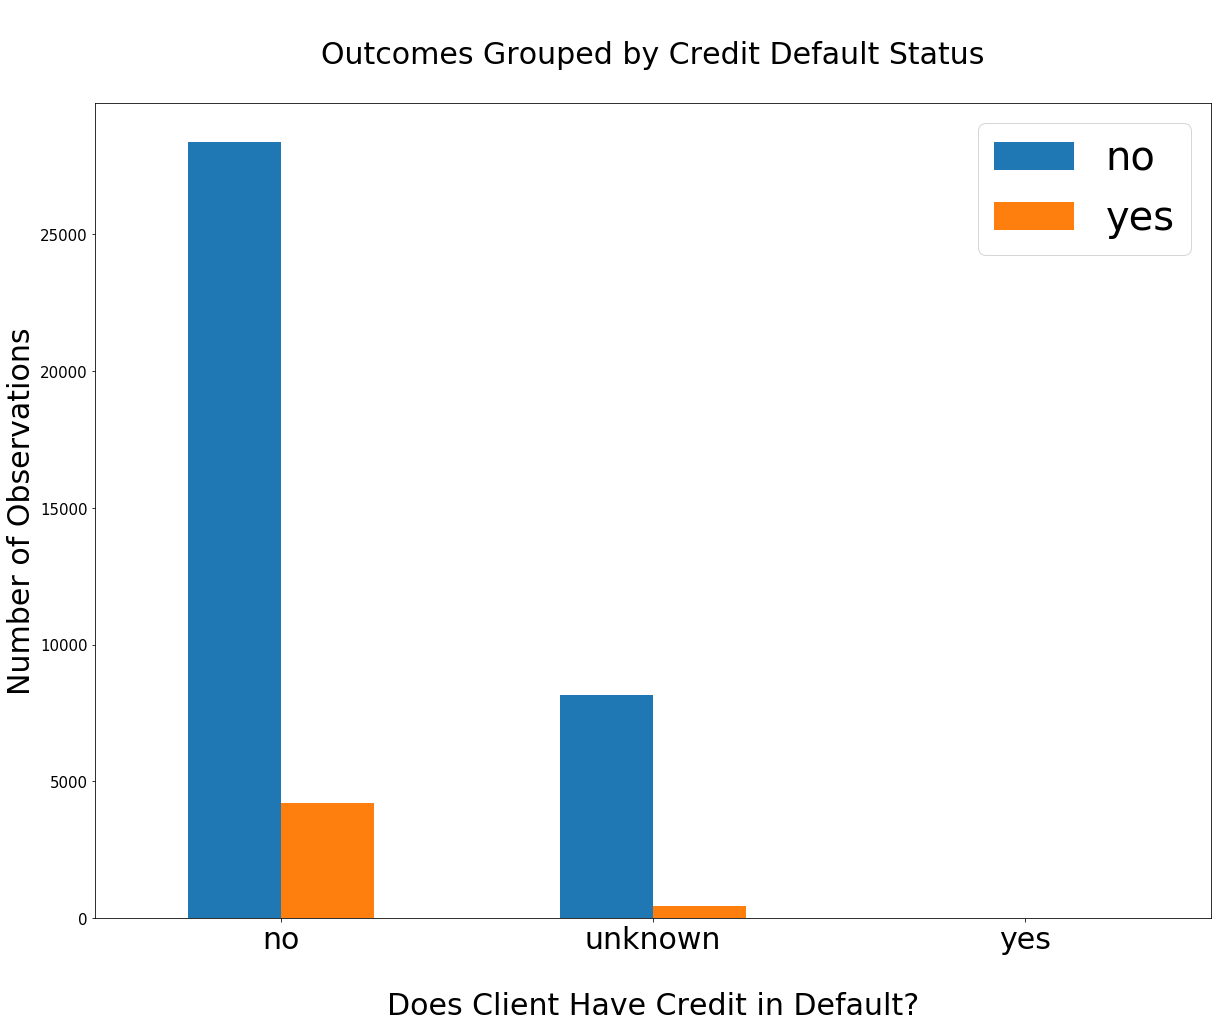

In [79]:
#----- Create a histogram showing relationship between DEFAULT and target variable
temp_df = pd.crosstab(full_df['default'].sort_values(), full_df['target'])
ax = temp_df.plot(kind='bar',fontsize=15,figsize=[20,15])
ax.set_title('\nOutcomes Grouped by Credit Default Status\n', fontsize='30') 
ax.set_xlabel('\nDoes Client Have Credit in Default?', fontsize='30')
ax.set_ylabel('Number of Observations', fontsize='30')
ax.legend(fontsize='40')
plt.xticks(size=30)
plt.xticks(rotation=0)

In [80]:
#----- What is the proportion of UNKNOWN value in the DEFAULT feature?
print(full_df.groupby(['default']).size() / len(full_df) * 100)

default
no         79.120132
unknown    20.872584
yes         0.007284
dtype: float64


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

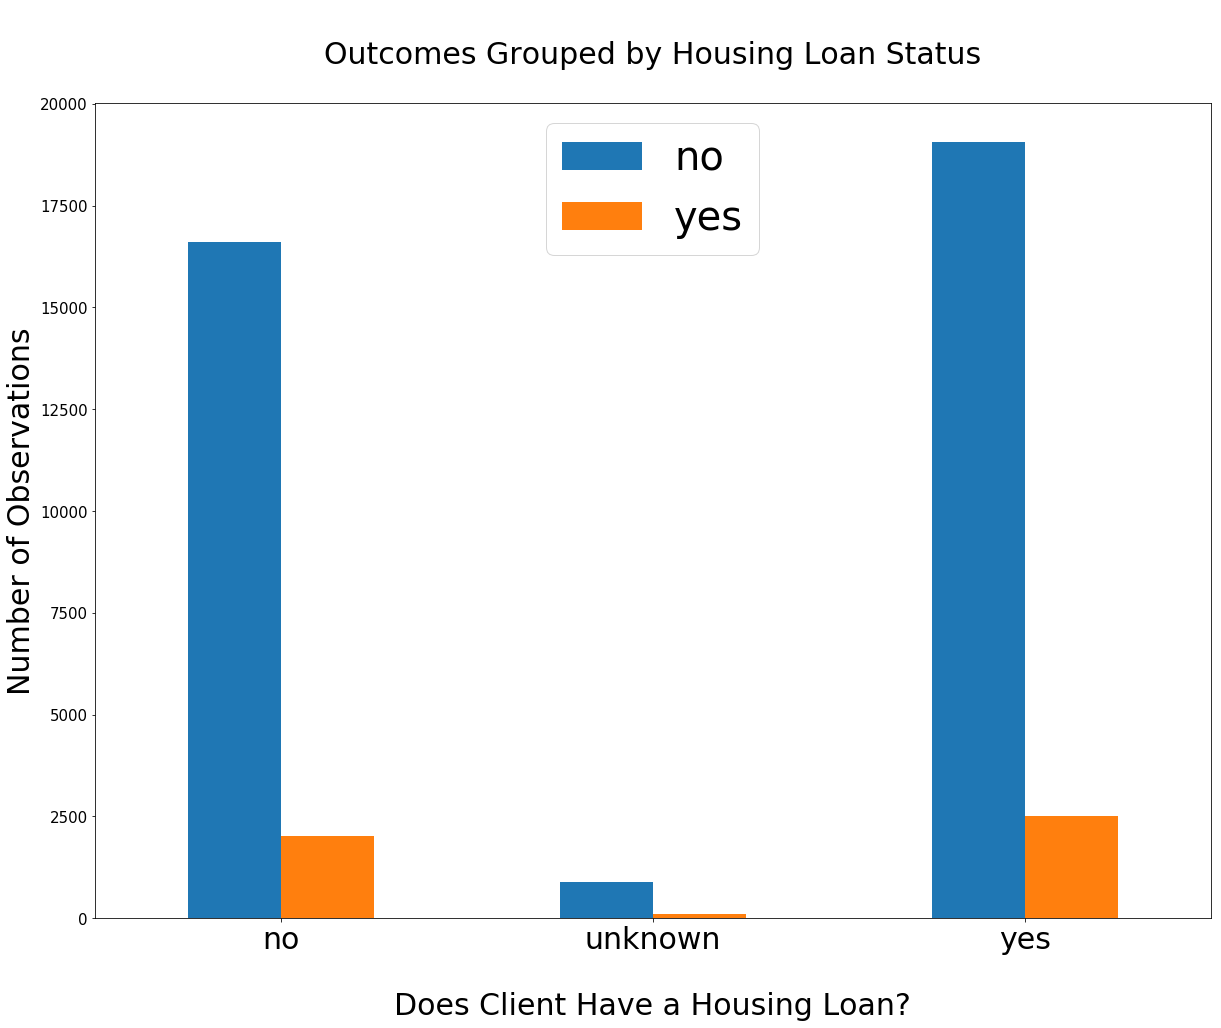

In [81]:
#----- Create a histogram showing relationship between HOUSING and target variable
temp_df = pd.crosstab(full_df['housing'].sort_values(), full_df['target'])
ax = temp_df.plot(kind='bar',fontsize=15,figsize=[20,15])
ax.set_title('\nOutcomes Grouped by Housing Loan Status\n', fontsize='30') 
ax.set_xlabel('\nDoes Client Have a Housing Loan?', fontsize='30')
ax.set_ylabel('Number of Observations', fontsize='30')
ax.legend(fontsize='40')
plt.xticks(size=30)
plt.xticks(rotation=0)

In [82]:
#----- What is the proportion of UNKNOWN value in the HOUSING feature?
print(full_df.groupby(['housing']).size() / len(full_df) * 100)

housing
no         45.212198
unknown     2.403613
yes        52.384190
dtype: float64


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

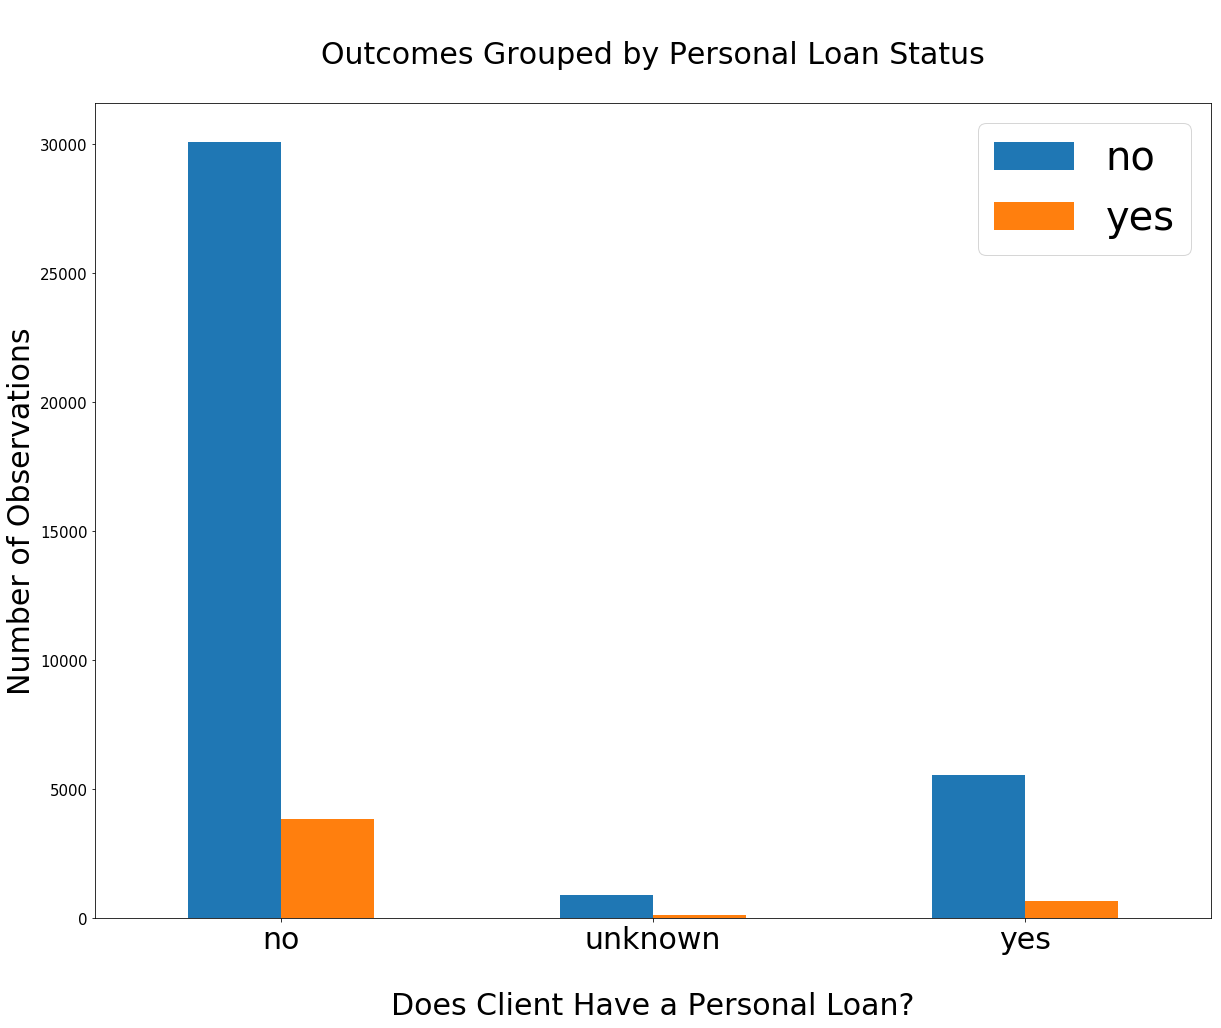

In [83]:
#----- Create a histogram showing relationship between LOAN and target variable
temp_df = pd.crosstab(full_df['loan'].sort_values(), full_df['target'])
ax = temp_df.plot(kind='bar',fontsize=15,figsize=[20,15])
ax.set_title('\nOutcomes Grouped by Personal Loan Status\n', fontsize='30') 
ax.set_xlabel('\nDoes Client Have a Personal Loan?', fontsize='30')
ax.set_ylabel('Number of Observations', fontsize='30')
ax.legend(fontsize='40')
plt.xticks(size=30)
plt.xticks(rotation=0)

In [84]:
#----- What is the proportion of UNKNOWN value in the LOAN feature?
print(full_df.groupby(['loan']).size() / len(full_df) * 100)

loan
no         82.426920
unknown     2.403613
yes        15.169467
dtype: float64


(array([0, 1]), <a list of 2 Text xticklabel objects>)

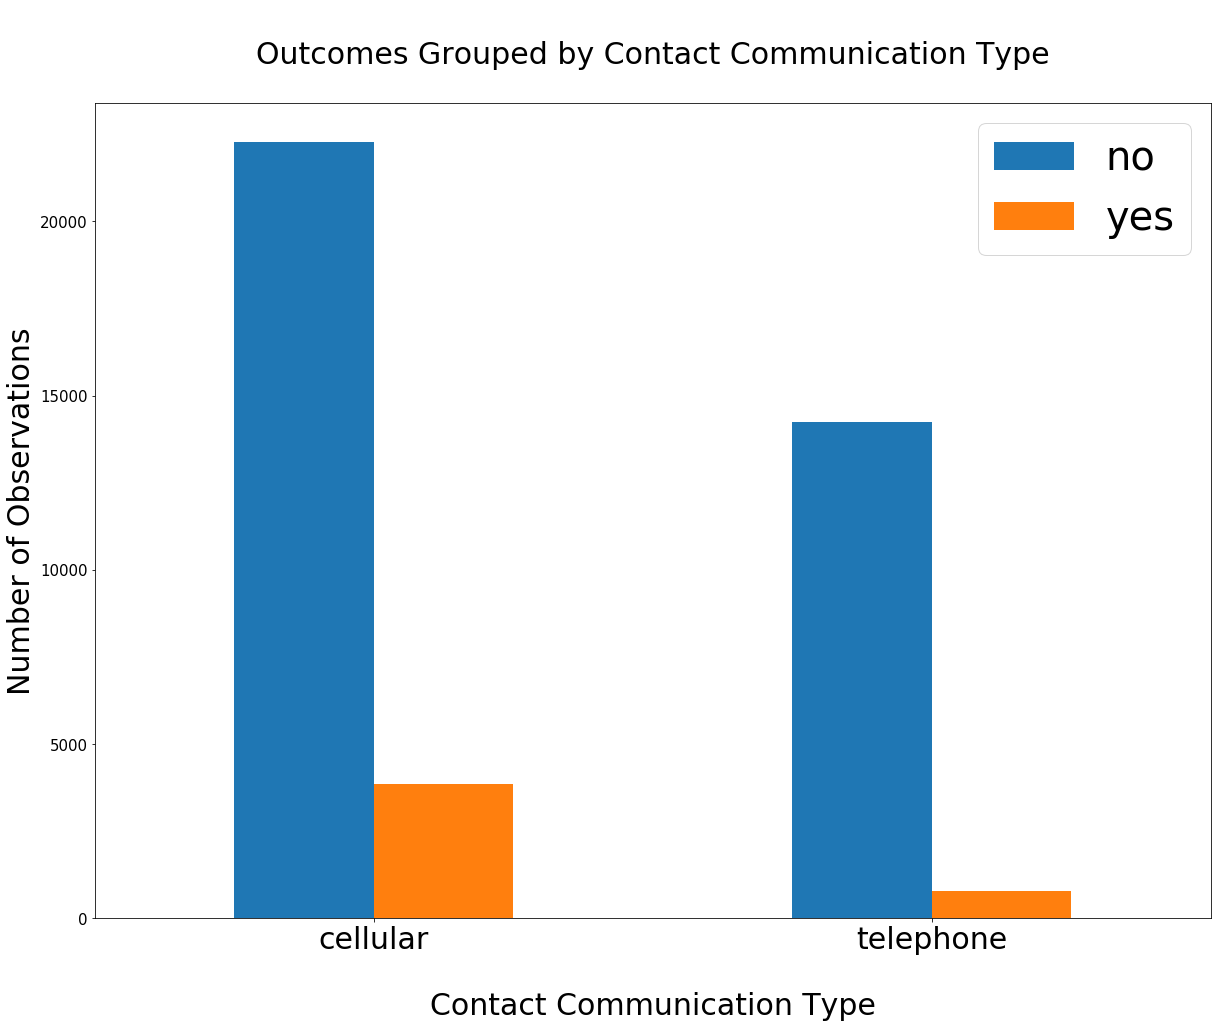

In [85]:
#----- Create a histogram showing relationship between CONTACT and target variable
temp_df = pd.crosstab(full_df['contact'].sort_values(), full_df['target'])
ax = temp_df.plot(kind='bar',fontsize=15,figsize=[20,15])
ax.set_title('\nOutcomes Grouped by Contact Communication Type\n', fontsize='30') 
ax.set_xlabel('\nContact Communication Type', fontsize='30')
ax.set_ylabel('Number of Observations', fontsize='30')
ax.legend(fontsize='40')
plt.xticks(size=30)
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

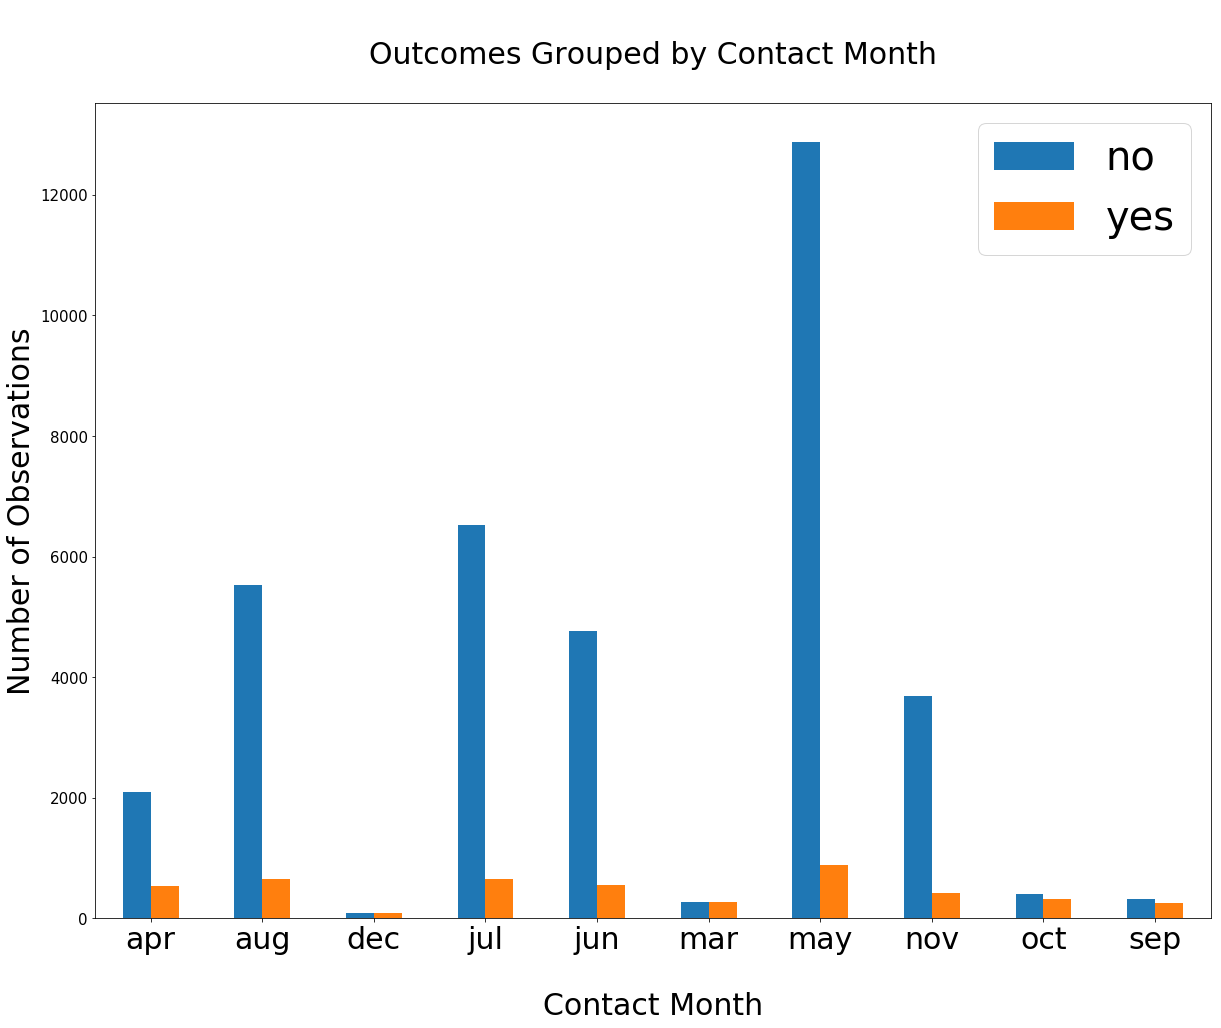

In [86]:
#----- Create a histogram showing relationship between MONTH and target variable
temp_df = pd.crosstab(full_df['month'].sort_values(), full_df['target'])
ax = temp_df.plot(kind='bar',fontsize=15,figsize=[20,15])
ax.set_title('\nOutcomes Grouped by Contact Month\n', fontsize='30') 
ax.set_xlabel('\nContact Month', fontsize='30')
ax.set_ylabel('Number of Observations', fontsize='30')
ax.legend(fontsize='40')
plt.xticks(size=30)
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

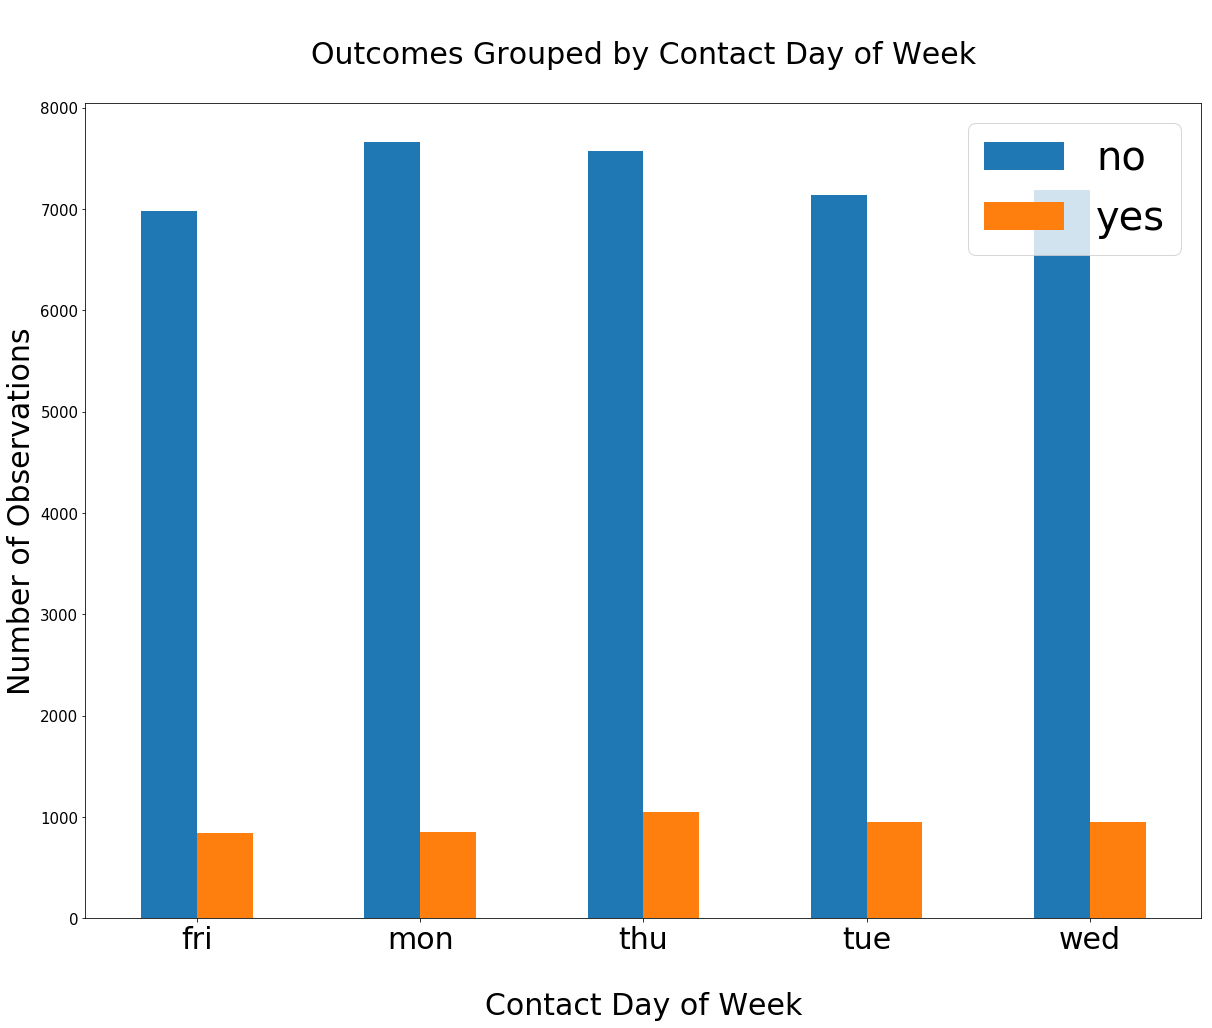

In [87]:
#----- Create a histogram showing relationship between DAY_OF_WEEK and target variable
temp_df = pd.crosstab(full_df['day_of_week'].sort_values(), full_df['target'])
ax = temp_df.plot(kind='bar',fontsize=15,figsize=[20,15])
ax.set_title('\nOutcomes Grouped by Contact Day of Week\n', fontsize='30') 
ax.set_xlabel('\nContact Day of Week', fontsize='30')
ax.set_ylabel('Number of Observations', fontsize='30')
ax.legend(fontsize='40')
plt.xticks(size=30)
plt.xticks(rotation=0)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

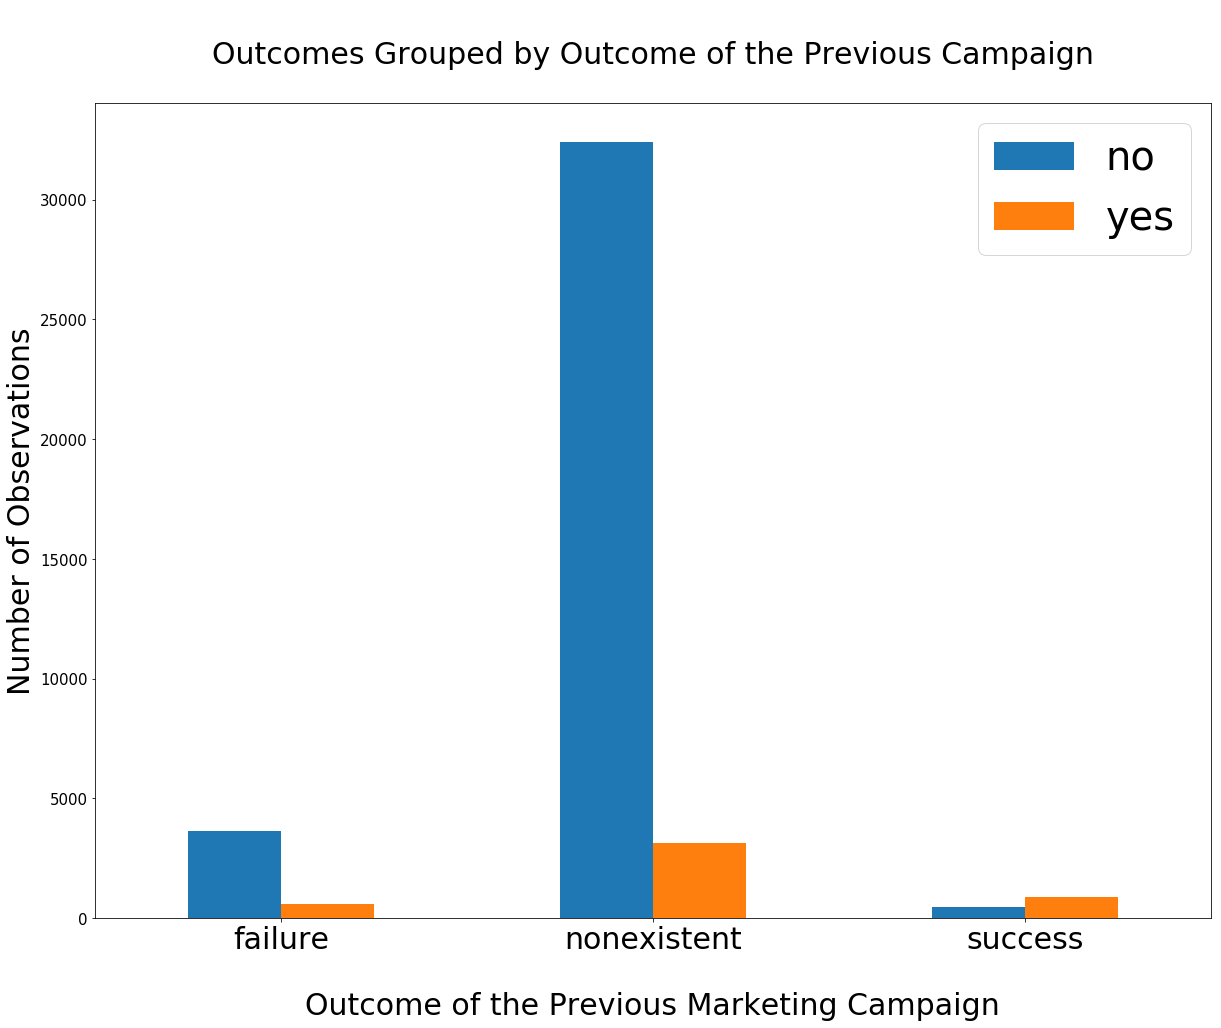

In [88]:
#----- Create a histogram showing relationship between POUTCOME and target variable
temp_df = pd.crosstab(full_df['poutcome'].sort_values(), full_df['target'])
ax = temp_df.plot(kind='bar',fontsize=15,figsize=[20,15])
ax.set_title('\nOutcomes Grouped by Outcome of the Previous Campaign\n', fontsize='30') 
ax.set_xlabel('\nOutcome of the Previous Marketing Campaign', fontsize='30')
ax.set_ylabel('Number of Observations', fontsize='30')
ax.legend(fontsize='40')
plt.xticks(size=30)
plt.xticks(rotation=0)

In [89]:
#----- What is the proportion of NONEXISTANT value in the POUTCOME feature?
print(full_df.groupby(['poutcome']).size() / len(full_df) * 100)

poutcome
failure        10.323395
nonexistent    86.343110
success         3.333495
dtype: float64


# Explore Correlation between the Features

In [90]:
#----- Generate a correlation matrix to get a sense of the correlation between the numerical features.
rs = np.random.RandomState(0)
corr = full_df.corr()
corr.style.background_gradient()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
age,1,-0.000865705,0.00459358,-0.034369,0.0243647,-0.000370685,0.000856715,0.129372,0.0107674,-0.0177251
duration,-0.000865705,1,-0.0716992,-0.047577,0.0206404,-0.0279679,0.00531227,-0.00817287,-0.0328967,-0.0447032
campaign,0.00459358,-0.0716992,1,0.0525836,-0.0791415,0.150754,0.127836,-0.0137331,0.135133,0.144095
pdays,-0.034369,-0.047577,0.0525836,1,-0.587514,0.271004,0.0788891,-0.0913424,0.296899,0.372605
previous,0.0243647,0.0206404,-0.0791415,-0.587514,1,-0.420489,-0.20313,-0.0509364,-0.454494,-0.501333
emp_var_rate,-0.000370685,-0.0279679,0.150754,0.271004,-0.420489,1,0.775334,0.196041,0.972245,0.90697
cons_price_idx,0.000856715,0.00531227,0.127836,0.0788891,-0.20313,0.775334,1,0.0589862,0.68823,0.522034
cons_conf_idx,0.129372,-0.00817287,-0.0137331,-0.0913424,-0.0509364,0.196041,0.0589862,1,0.277686,0.100513
euribor3m,0.0107674,-0.0328967,0.135133,0.296899,-0.454494,0.972245,0.68823,0.277686,1,0.945154
nr_employed,-0.0177251,-0.0447032,0.144095,0.372605,-0.501333,0.90697,0.522034,0.100513,0.945154,1


# Drop Some Features from the Dataset

In [91]:
del full_df['pdays']
del full_df['default']

# Transform Categorical Features into Numerical Dummy Variables

In [92]:
#----- Create a new dataframe called 'dummies_df' and convert
#----- all categorical variables to numerical variables.
#-----
#----- Add a prefix to each new column for ease of identification.
#----- Drop first column of each variable in order to minimize the dimensionality of the dataset.
#-----
dummies_df = pd.get_dummies(full_df,    prefix='job_',        columns=['job'],        drop_first=True)
dummies_df = pd.get_dummies(dummies_df, prefix='marital_',    columns=['marital'],    drop_first=True)
dummies_df = pd.get_dummies(dummies_df, prefix='education_',  columns=['education'],  drop_first=True)
dummies_df = pd.get_dummies(dummies_df, prefix='housing_',    columns=['housing'],    drop_first=True)
dummies_df = pd.get_dummies(dummies_df, prefix='loan_',       columns=['loan'],       drop_first=True)
dummies_df = pd.get_dummies(dummies_df, prefix='contact_',    columns=['contact'],    drop_first=True)
dummies_df = pd.get_dummies(dummies_df, prefix='month_',      columns=['month'],      drop_first=True)
dummies_df = pd.get_dummies(dummies_df, prefix='day_of_week_',columns=['day_of_week'],drop_first=True)
dummies_df = pd.get_dummies(dummies_df, prefix='poutcome_',   columns=['poutcome'],   drop_first=True)
dummies_df = pd.get_dummies(dummies_df,                       columns=['target'],     drop_first=True)

In [93]:
#----- The name of the "target" variable has been changed to "target_yes".
#----- Restore the name to "target" (just for the sake of cleanliness).
dummies_df.rename(columns={'target_yes':'target'}, inplace=True)

In [94]:
#----- Display the structure of the 'dummies_df' dataframe.
dummies_df.dtypes

age                                 int64
duration                            int64
campaign                            int64
previous                            int64
emp_var_rate                      float64
cons_price_idx                    float64
cons_conf_idx                     float64
euribor3m                         float64
nr_employed                       float64
job__blue-collar                    uint8
job__entrepreneur                   uint8
job__housemaid                      uint8
job__management                     uint8
job__retired                        uint8
job__self-employed                  uint8
job__services                       uint8
job__student                        uint8
job__technician                     uint8
job__unemployed                     uint8
job__unknown                        uint8
marital__married                    uint8
marital__single                     uint8
marital__unknown                    uint8
education__basic.6y               

In [95]:
#----- Peek at the first few lines of the data frame to confirm that the column values are as expected.
dummies_df.sample(5)

,age,duration,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job__blue-collar,...,month__nov,month__oct,month__sep,day_of_week__mon,day_of_week__thu,day_of_week__tue,day_of_week__wed,poutcome__nonexistent,poutcome__success,target
38903,35,56,1,2,-3.4,92.649,-30.1,0.716,5017.5,0,...,1,0,0,0,0,1,0,0,1,0
23874,32,63,1,0,1.4,93.444,-36.1,4.963,5228.1,0,...,0,0,0,0,0,0,0,1,0,0
5867,33,125,3,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,0,1,0,0,0,1,0,0
24554,39,501,1,0,-0.1,93.200,-42.0,4.191,5195.8,0,...,1,0,0,1,0,0,0,1,0,0
7199,37,512,5,0,1.1,93.994,-36.4,4.860,5191.0,0,...,0,0,0,0,1,0,0,1,0,0


# Standardize the Features

In [96]:
#----- Standardize all of the features in the dummies_df dataframe.
#----- The result will be placed in a numpy array.
scaler = StandardScaler()
scaled_array = scaler.fit_transform(dummies_df)

In [97]:
#----- Convert the numpy array to a dataframe.
#----- The index and columns keyword arguments are used to keep the original indices and column names.
scaled_df = pd.DataFrame(scaled_array, index=dummies_df.index, columns=dummies_df.columns)

In [98]:
#----- Peek at the data to confirm that the scaling process was successful.
scaled_df.sample(5)

,age,duration,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job__blue-collar,...,month__nov,month__oct,month__sep,day_of_week__mon,day_of_week__thu,day_of_week__tue,day_of_week__wed,poutcome__nonexistent,poutcome__success,target
13980,-0.769980,-0.583490,-0.204909,-0.349494,0.839061,0.591424,-0.474791,0.773575,0.845170,-0.538317,...,-0.332532,-0.133197,-0.118462,-0.510465,-0.514581,-0.494394,-0.496067,0.397706,-0.18570,-0.356309
35779,-1.441693,-0.957609,-0.204909,-0.349494,-1.197935,-1.179380,-1.231034,-1.370650,-0.940281,1.857642,...,-0.332532,-0.133197,-0.118462,1.959000,-0.514581,-0.494394,-0.496067,0.397706,-0.18570,-0.356309
35707,-1.249775,-0.355933,0.517118,-0.349494,-1.197935,-1.179380,-1.231034,-1.370650,-0.940281,-0.538317,...,-0.332532,-0.133197,-0.118462,1.959000,-0.514581,-0.494394,-0.496067,0.397706,-0.18570,-0.356309
37597,3.452213,0.191745,-0.565922,1.671136,-1.898153,-2.374889,1.966794,-1.591472,-1.257233,-0.538317,...,-0.332532,-0.133197,-0.118462,1.959000,-0.514581,-0.494394,-0.496067,-2.514421,5.38503,2.806550
8220,-0.865939,-0.355933,-0.565922,-0.349494,0.839061,1.536429,-0.280328,0.716496,0.845170,-0.538317,...,-0.332532,-0.133197,-0.118462,-0.510465,-0.514581,2.022677,-0.496067,0.397706,-0.18570,-0.356309


# Handle the Unbalanced Data Using Random Under-Sampling

In [99]:
#----- The target variable was scaled in the previous steps. Convert its' values back to '0' and '1' because
#----- working with 0/1 is more intuitive than working with -0.35/2.80 and the columns will need to contain
#----- integers for the predictive models.
scaled_df['target'][(scaled_df['target'] < 0)] = 0
scaled_df['target'][(scaled_df['target'] > 0)] = 1
scaled_df['target'] = scaled_df['target'].apply(int)

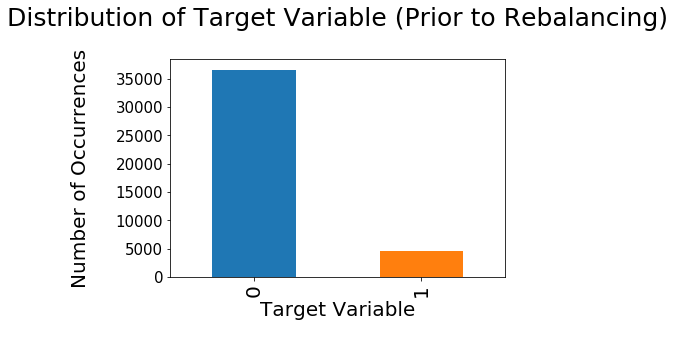

In [100]:
#----- Generate a bar chart showing the current distribution of the target variable.
scaled_df.target.value_counts().plot(kind='bar');
plt.title('Distribution of Target Variable (Prior to Rebalancing)\n',size=25)
plt.ylabel('Number of Occurrences\n',size=20)
plt.xlabel('Target Variable\n',size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.rcParams['figure.figsize'] = [7, 7]

In [101]:
#----- Create a new dataframe to hold the rows for each target value ('0' and '1')
target_0_df = scaled_df[scaled_df['target'] == 0]
target_1_df = scaled_df[scaled_df['target'] == 1]

In [102]:
#----- Use the undersampling technique to reduce the number of '0' rows.
#-----
#----- Undersampling means that we will reduce the number of rows with target = '0' to n rows,
#----- where n is the number of rows with a target of '1'. 
#----- In this dataset, there are 4640 rows with a target of '1'. Therefore, the number of rows
#----- with a target of '0' will be reduced to a random sample of 4640 rows.
count_target_1 = target_1_df.target.count()              # Count the number of '1' rows.
target_0_df_under = target_0_df.sample(count_target_1)   # Reduce the number of '0' rows.

In [103]:
#----- Concatenate the rows with an outcome of '1' with the reduced number of rows with an outcome of '0'.
#----- Place the results in a dataframe called 'balanced_df'.
balanced_df = pd.concat([target_0_df_under, target_1_df], axis=0)

In [104]:
#----- Display the shape of the dataframe that has a balanced target column.
print(balanced_df.shape)

(9280, 51)


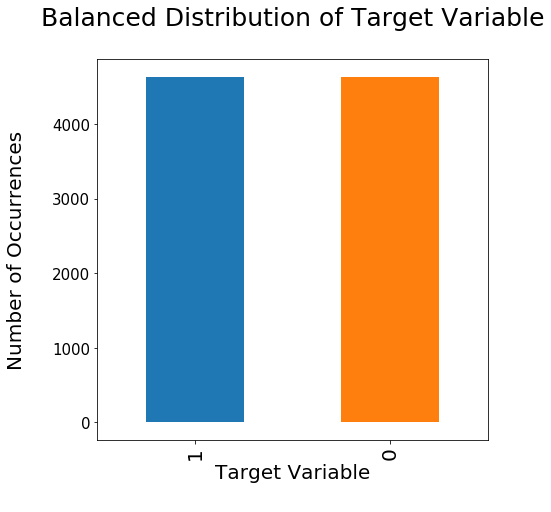

In [105]:
#----- Generate a bar chart showing the new distribution of the target variable.
#----- The distribution is now balanced.
balanced_df.target.value_counts().plot(kind='bar');
plt.plot(balanced_df)
plt.title('Balanced Distribution of Target Variable\n',size=25)
plt.ylabel('Number of Occurrences\n',size=20)
plt.xlabel('Target Variable\n',size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.rcParams['figure.figsize'] = [7, 7]

# Separate the Dataset Features into X and Y Datasets

In [106]:
#----- Create a dataframe called 'X' to hold only the model’s independent variables.
X = balanced_df.copy()
del X['target']      # Remove the target variable.

In [107]:
#----- Create a dataframe called 'Y' to hold only the model’s target variable.
Y = balanced_df['target']

# Perform Primary Component Analysis on the Dependent Variables

In [108]:
#----- Perform the Principal Component Analysis on the balanced dataset of dependent variables.
pca = PCA(n_components = 50)
sklearn_pca_X = pca.fit_transform(X)

In [109]:
#----- The goal is find out how many how many components would be enough to explain almost all of the
#----- data variance. First, the covariance matrix must be generated.
covariance_matrix = np.cov(X.T)

In [110]:
#----- Display the covariance matrix to confirm that it was generated successfully.
print(covariance_matrix)

[[ 1.34817290e+00 -2.53674390e-02 -1.00156799e-02 ... -2.18111291e-02
  -8.81915625e-02  1.21346946e-01]
 [-2.53674390e-02  1.89412697e+00 -1.15355081e-02 ...  9.75338553e-03
   7.29047243e-02 -6.89201427e-02]
 [-1.00156799e-02 -1.15355081e-02  6.71347352e-01 ... -1.10177222e-02
   1.12818085e-01 -1.22392196e-01]
 ...
 [-2.18111291e-02  9.75338553e-03 -1.10177222e-02 ...  1.01170946e+00
  -1.66724529e-03  1.40021713e-02]
 [-8.81915625e-02  7.29047243e-02  1.12818085e-01 ... -1.66724529e-03
   1.44120646e+00 -1.30865888e+00]
 [ 1.21346946e-01 -6.89201427e-02 -1.22392196e-01 ...  1.40021713e-02
  -1.30865888e+00  2.86790634e+00]]


In [111]:
#----- Use the covariance matrix to calculate the Eigen Vectors and Eigen Values.
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

In [112]:
#----- Display the Eigen Values to confirm that they were generated successfully.
print(eig_vals)

[7.58551343e+00 3.17369268e+00 2.99828014e+00 2.55271425e+00
 2.37191993e+00 2.35246153e+00 2.15997745e+00 2.09063223e+00
 1.98464616e+00 1.87248673e+00 1.77484581e+00 1.65300215e+00
 8.90504619e-02 7.87547404e-02 3.60804600e-03 7.06777310e-03
 1.95155927e-01 2.16511585e-01 2.50317021e-01 2.27379182e-01
 2.35480571e-01 1.56006520e+00 1.46997056e+00 4.51960020e-01
 4.96290409e-01 5.37190463e-01 1.38196988e+00 6.22640505e-01
 6.71384314e-01 6.92393334e-01 7.24401879e-01 7.53337672e-01
 1.30378921e+00 1.28386441e+00 1.25901469e+00 1.24162265e+00
 1.20650726e+00 1.18617584e+00 1.16984076e+00 1.10877908e+00
 1.08572996e+00 1.05456510e+00 1.03353958e+00 8.93281785e-01
 9.77791103e-01 9.64774547e-01 9.16537801e-01 9.23428988e-01
 9.43672701e-01 8.35303258e-17]


In [113]:
#----- Display the Eigen values (in descending order) as well as their percentages of variance and cumulative percentages.
print("\n    Eigen value\t\tPercentage of Variance\t\tCumulative Percentage\n")
counter = 1
cumulative_pct = 0.0

for i in list(np.sort(eig_vals)[::-1]):
   cumulative_pct = cumulative_pct + (i/sum(eig_vals)*100)
   print("%d\t%.3f\t\t\t%.3f\t\t\t\t%.3f" % 
           (counter,i,(i/sum(eig_vals)*100),cumulative_pct))
   counter = counter + 1


    Eigen value		Percentage of Variance		Cumulative Percentage

1	7.586			12.277				12.277
2	3.174			5.136				17.413
3	2.998			4.853				22.266
4	2.553			4.131				26.397
5	2.372			3.839				30.236
6	2.352			3.807				34.043
7	2.160			3.496				37.539
8	2.091			3.384				40.922
9	1.985			3.212				44.135
10	1.872			3.031				47.165
11	1.775			2.872				50.037
12	1.653			2.675				52.713
13	1.560			2.525				55.238
14	1.470			2.379				57.617
15	1.382			2.237				59.853
16	1.304			2.110				61.963
17	1.284			2.078				64.041
18	1.259			2.038				66.079
19	1.242			2.009				68.088
20	1.207			1.953				70.041
21	1.186			1.920				71.961
22	1.170			1.893				73.854
23	1.109			1.794				75.649
24	1.086			1.757				77.406
25	1.055			1.707				79.113
26	1.034			1.673				80.785
27	0.978			1.582				82.368
28	0.965			1.561				83.929
29	0.944			1.527				85.456
30	0.923			1.495				86.951
31	0.917			1.483				88.434
32	0.893			1.446				89.880
33	0.753			1.219				91.099
34	0.724			1.172				92.272
35	0.692			1.121				93.39

(array([-0.02,  0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14]),
 <a list of 9 Text yticklabel objects>)

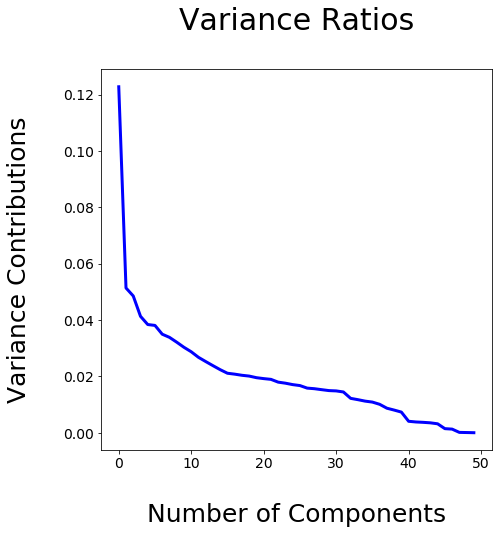

In [114]:
#----- Plot the variance ratios for each component. This will show us where the variance contributions become minimal.
explained_variance = pca.explained_variance_ratio_
plt.plot(explained_variance,color='Blue', linewidth=3)
plt.rcParams['figure.figsize'] = [9, 9]
plt.title('Variance Ratios\n',size=30)
plt.ylabel('Variance Contributions\n',size=25)
plt.xlabel('\nNumber of Components',size=25)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Estimate the Importance of Features using Extra Trees Classifier Decision Tree

In [115]:
#----- Build a forest and compute the importance of each feature.
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(X,Y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [116]:
#----- Store the importance values and display them to confirm that they have been generated.
importances = forest.feature_importances_
print(importances)

[6.04940395e-02 2.75227155e-01 4.41025421e-02 1.01264906e-02
 4.45796762e-02 1.69421018e-02 1.85380712e-02 1.05942630e-01
 5.03260599e-02 1.21213227e-02 5.67045364e-03 3.66316377e-03
 8.40792070e-03 6.69634104e-03 5.99452377e-03 8.17771766e-03
 5.18723979e-03 1.23385551e-02 4.48224294e-03 1.46607116e-03
 1.52617077e-02 1.29523411e-02 7.15980778e-04 6.31471022e-03
 1.00457755e-02 1.27607391e-02 1.94958841e-04 9.60030711e-03
 1.27980942e-02 6.03664331e-03 2.41779867e-03 2.39757059e-02
 2.39353432e-03 1.57835041e-02 2.01877872e-02 2.77456309e-03
 6.82934924e-04 2.79982314e-03 4.34546249e-03 5.38909291e-03
 2.00946450e-02 4.11002750e-03 7.62952002e-03 2.29975781e-03
 1.38000630e-02 1.36006767e-02 1.23525105e-02 1.31620855e-02
 1.79297157e-02 2.71052145e-02]


In [117]:
#----- Sort the array elements by the importance values, in descending order.
indices = np.argsort(importances)[::-1]

In [118]:
#----- Display the features and their importance values, in descending order of importance.
print("\n                                                              Importance     Cumulative")
print("                                                                             Importance")
print("----------------------------------------------------------------------------------------")
cumulative_pct = 0
for i in range(0,X.shape[1]):
    cumulative_pct += importances[indices[i]]
    print("%d\tFeature %d: %30s\t\t%0.2f\t\t%0.2f" % (i+1, indices[i], X.columns.values[indices[i]],
                                                      importances[indices[i]]*100, cumulative_pct*100))


                                                              Importance     Cumulative
                                                                             Importance
----------------------------------------------------------------------------------------
1	Feature 1:                       duration		27.52		27.52
2	Feature 7:                      euribor3m		10.59		38.12
3	Feature 0:                            age		6.05		44.17
4	Feature 8:                    nr_employed		5.03		49.20
5	Feature 4:                   emp_var_rate		4.46		53.66
6	Feature 2:                       campaign		4.41		58.07
7	Feature 49:              poutcome__success		2.71		60.78
8	Feature 31:                   housing__yes		2.40		63.18
9	Feature 34:             contact__telephone		2.02		65.19
10	Feature 40:                     month__may		2.01		67.20
11	Feature 6:                  cons_conf_idx		1.85		69.06
12	Feature 48:          poutcome__nonexistent		1.79		70.85
13	Feature 5:                 cons_price

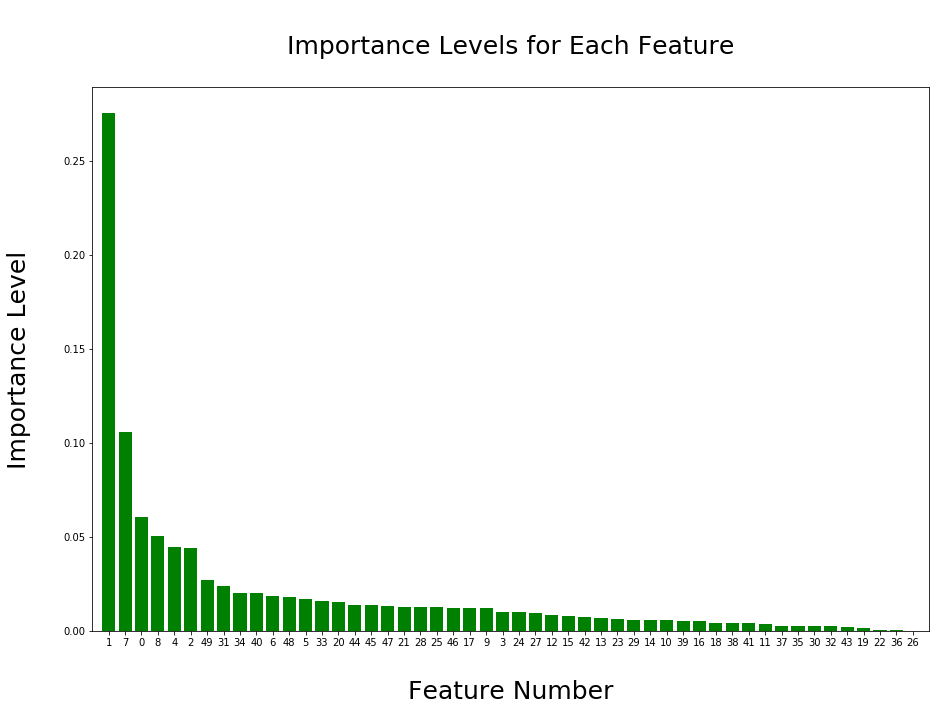

In [119]:
#----- Plot the feature importances, in descending order of importance.
plt.figure(figsize=(15,10))
plt.title("\nImportance Levels for Each Feature\n", size=25)
plt.ylabel('Importance Level\n',size=25)
plt.xlabel('\nFeature Number',size=25)
plt.bar(range(X.shape[1]), importances[indices], color="green", align="center")
plt.xticks(range(X.shape[1]), indices, size=10)
plt.xlim([-1, X.shape[1]])
plt.show()

# Remove the Least Important Features

In [120]:
#----- Remove the features with the lowest importances from the dataframe that holds the independent variables.
del X['job__self-employed']
del X['job__student']
del X['job__unemployed']
del X['job__housemaid']
del X['month__nov']
del X['month__aug']
del X['month__jun']
del X['housing__unknown']
del X['loan__unknown']
del X['month__jul']
del X['month__sep']
del X['job__unknown']
del X['marital__unknown']
del X['month__dec']
del X['education__illiterate']

In [121]:
#----- Display the remaining columns to see the list of features
#----- that will be used from this point onwards.
X.dtypes

age                               float64
duration                          float64
campaign                          float64
previous                          float64
emp_var_rate                      float64
cons_price_idx                    float64
cons_conf_idx                     float64
euribor3m                         float64
nr_employed                       float64
job__blue-collar                  float64
job__entrepreneur                 float64
job__management                   float64
job__retired                      float64
job__services                     float64
job__technician                   float64
marital__married                  float64
marital__single                   float64
education__basic.6y               float64
education__basic.9y               float64
education__high.school            float64
education__professional.course    float64
education__university.degree      float64
education__unknown                float64
housing__yes                      

# Split the Dataset into Training and Testing Sets

In [122]:
#----- Split the data into training/testing sets using a 75/25 ratio.
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

In [123]:
#----- Look at the shape of the X training data set and peek at the data.
print(x_train.shape)
print(x_train.head())

(6960, 35)
            age  duration  campaign  previous  emp_var_rate  cons_price_idx  \
4690   1.533034  0.963124 -0.565922 -0.349494      0.648092        0.722722   
3031   1.053240 -0.008813 -0.204909 -0.349494      0.648092        0.722722   
36867  1.437075 -0.556492  0.156105 -0.349494     -1.898153       -1.058448   
21777 -0.674021 -0.290366  0.156105 -0.349494      0.839061       -0.227465   
5123  -1.249775 -0.348220 -0.565922 -0.349494      0.648092        0.722722   

       cons_conf_idx  euribor3m  nr_employed  job__blue-collar  \
4690        0.886447   0.713036     0.331680          1.857642   
3031        0.886447   0.713613     0.331680          1.857642   
36867      -0.064259  -1.366037    -1.257233         -0.538317   
21777       0.951267   0.774152     0.845170         -0.538317   
5123        0.886447   0.712460     0.331680          1.857642   

             ...          contact__telephone  month__mar  month__may  \
4690         ...                     1.31827 

In [124]:
#----- Look at the shape of the X testing data set and peek at the data.
print(x_test.shape)
print(x_test.head())

(2320, 35)
            age  duration  campaign  previous  emp_var_rate  cons_price_idx  \
17871 -0.194227  3.084415 -0.565922 -0.349494      0.839061        0.591424   
15197 -1.345734  3.443106 -0.565922 -0.349494      0.839061        0.591424   
5948   0.477486  3.103699  0.878132 -0.349494      0.648092        0.722722   
30586 -0.002309  0.411588  0.517118 -0.349494     -1.197935       -1.179380   
20920 -0.482104 -0.849616 -0.565922 -0.349494      0.839061       -0.227465   

       cons_conf_idx  euribor3m  nr_employed  job__blue-collar  \
17871      -0.474791   0.772422     0.845170         -0.538317   
15197      -0.474791   0.770692     0.845170         -0.538317   
5948        0.886447   0.712460     0.331680         -0.538317   
30586      -1.231034  -1.307228    -0.940281         -0.538317   
20920       0.951267   0.774152     0.845170         -0.538317   

             ...          contact__telephone  month__mar  month__may  \
17871        ...                    -0.75857 

In [125]:
#----- Look at the shape of the Y training data set and peek at the data.
print(y_train.shape)
print(y_train.head())

(6960,)
4690     0
3031     0
36867    1
21777    0
5123     0
Name: target, dtype: int64


In [126]:
#----- Look at the shape of the Y testing data set and peek at the data.
print(y_test.shape)
print(y_test.head())

(2320,)
17871    1
15197    0
5948     1
30586    1
20920    0
Name: target, dtype: int64


# Logistic Regression

In [127]:
#----- Build the logistic regression model and train it using the training data sets
LR_model = LogisticRegression()
LR_model.fit (x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [128]:
#----- Make predictions using the testing data set
LR_predictions =  LR_model.predict(x_test)
print("\nPredicted values are:\n",LR_predictions)


Predicted values are:
 [1 1 1 ... 1 1 0]


# Random Forest (Decision Tree)

In [129]:
#----- Build the random forest model and train it using the training data sets
DT_model = RandomForestClassifier(criterion='entropy', min_samples_split=200,  max_features='auto',
                                  max_leaf_nodes=None, verbose=0)
DT_model =DT_model.fit(x_train, y_train)

In [130]:
#----- Make predictions using the testing data set
DT_predictions =  DT_model.predict(x_test)
print("\nPredicted values are:\n",DT_predictions)


Predicted values are:
 [1 1 1 ... 1 1 0]


# K-Nearest Neighbours

In [131]:
#----- Build the K-Nearest Neighbours model and train it using the training data sets
KNN_model = KNeighborsClassifier(25)
KNN_model.fit (x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=25, p=2,
           weights='uniform')

In [132]:
#----- Make predictions using the testing data set
KNN_predictions =  KNN_model.predict(x_test)
print("\nPredicted values are:\n",KNN_predictions)


Predicted values are:
 [1 1 0 ... 1 1 0]


# Support Vector Classification

In [133]:
#----- Build the Support Vector model and train it using the training data sets
SV_model = SVC(probability=True)
SV_model.fit (x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [134]:
#----- Make predictions using the testing data set
SV_predictions =  SV_model.predict(x_test)
print("\nPredicted values are:\n",SV_predictions)


Predicted values are:
 [1 1 1 ... 1 1 0]


# Generate the Metrics for the Models

In [135]:
#----- Generate the accuracy scores for the models
LR_accuracy = accuracy_score(y_test, LR_predictions)
DT_accuracy = accuracy_score(y_test, DT_predictions)
KNN_accuracy = accuracy_score(y_test, KNN_predictions)
SV_accuracy = accuracy_score(y_test, SV_predictions)
print('\nLR accuracy score: \t %0.2f' % (LR_accuracy * 100))
print('DT accuracy score:\t %0.2f'    % (DT_accuracy * 100))
print('KNN accuracy score:\t %0.2f'   % (KNN_accuracy * 100))
print('SV accuracy score:\t %0.2f'   % (SV_accuracy * 100))


LR accuracy score: 	 88.28
DT accuracy score:	 88.97
KNN accuracy score:	 83.32
SV accuracy score:	 88.49


In [136]:
#----- Generate the precision scores for the models
LR_precision = precision_score(y_test, LR_predictions)
DT_precision = precision_score(y_test, DT_predictions)
KNN_precision = precision_score(y_test, KNN_predictions)
SV_precision = precision_score(y_test, SV_predictions)
print('\nLR precision score: \t %0.2f' % (LR_precision * 100))
print('DT precision score:\t %0.2f'    % (DT_precision * 100))
print('KNN precision score:\t %0.2f'   % (KNN_precision * 100))
print('SV precision score:\t %0.2f'   % (SV_precision * 100))


LR precision score: 	 87.87
DT precision score:	 84.72
KNN precision score:	 86.42
SV precision score:	 85.69


In [137]:
#----- Generate the recall scores for the models
LR_recall = recall_score(y_test, LR_predictions)
DT_recall = recall_score(y_test, DT_predictions)
KNN_recall = recall_score(y_test, KNN_predictions)
SV_recall = recall_score(y_test, SV_predictions)
print('\nLR recall score: \t %0.2f' % (LR_recall * 100))
print('DT recall score:\t %0.2f'    % (DT_recall * 100))
print('KNN recall score:\t %0.2f'   % (KNN_recall * 100))
print('SV recall score:\t %0.2f'    % (SV_recall * 100))


LR recall score: 	 88.93
DT recall score:	 95.19
KNN recall score:	 79.23
SV recall score:	 92.53


In [138]:
#----- Generate the F1 scores for the models
LR_f1 = f1_score(y_test, LR_predictions)
DT_f1 = f1_score(y_test, DT_predictions)
KNN_f1 = f1_score(y_test, KNN_predictions)
SV_f1 = f1_score(y_test, SV_predictions)
print('\nLR F1 score: \t %0.2f' % (LR_f1 * 100))
print('DT F1 score:\t %0.2f'    % (DT_f1 * 100))
print('KNN F1 score:\t %0.2f'   % (KNN_f1 * 100))
print('SV F1 score:\t %0.2f'   % (SV_f1 * 100))


LR F1 score: 	 88.40
DT F1 score:	 89.65
KNN F1 score:	 82.67
SV F1 score:	 88.98


In [139]:
#----- Generate the confusion matrices for the models using the predicted and actual results
LR_conf_matrix = confusion_matrix(y_test, LR_predictions)
DT_conf_matrix = confusion_matrix(y_test, DT_predictions)
KNN_conf_matrix = confusion_matrix(y_test, KNN_predictions)
SV_conf_matrix = confusion_matrix(y_test, SV_predictions)
print('\nLogistic Regression model:\n',LR_conf_matrix)
print('\nDecision Tree model:\n',DT_conf_matrix)
print('\nK-Nearest Neighbours model:\n',KNN_conf_matrix)
print('\nSupport Vector model:\n',SV_conf_matrix)


Logistic Regression model:
 [[1012  143]
 [ 129 1036]]

Decision Tree model:
 [[ 955  200]
 [  56 1109]]

K-Nearest Neighbours model:
 [[1010  145]
 [ 242  923]]

Support Vector model:
 [[ 975  180]
 [  87 1078]]


Text(60,0.5,'Predicted Values')

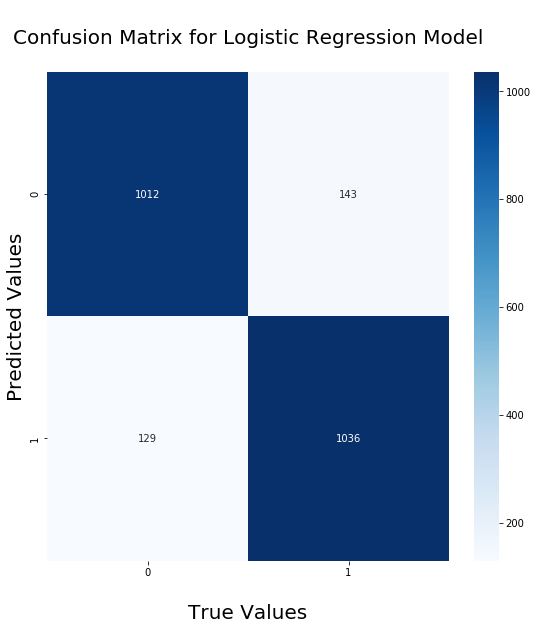

In [140]:
#----- Generate a heat map of the confusion matrix for the Logistic Regression model
LR_heatmap = sns.heatmap(LR_conf_matrix, cmap="Blues", annot=True, fmt="g")
plt.title('\nConfusion Matrix for Logistic Regression Model\n',size=20)
plt.xlabel('\nTrue Values',size=20)
plt.ylabel('Predicted Values',size=20)

Text(60,0.5,'Predicted Values')

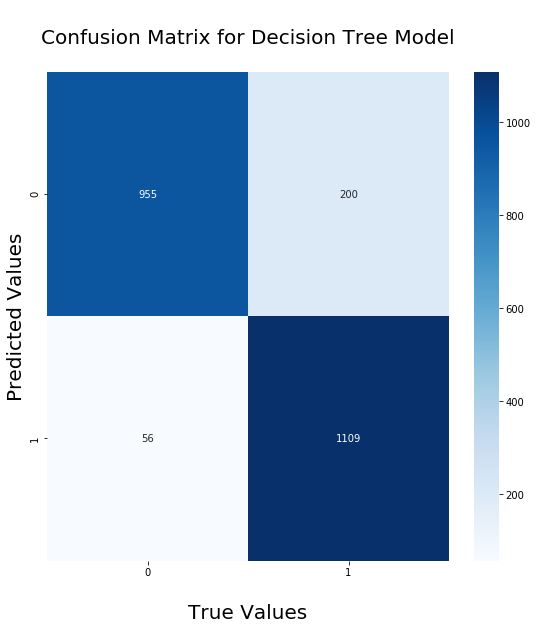

In [141]:
#----- Generate a heat map of the SNS confusion matrix for the Decision Tree model
DT_heatmap = sns.heatmap(DT_conf_matrix, cmap="Blues", annot=True, fmt="g")
plt.title('\nConfusion Matrix for Decision Tree Model\n',size=20)
plt.xlabel('\nTrue Values',size=20)
plt.ylabel('Predicted Values',size=20)

Text(60,0.5,'Predicted Values')

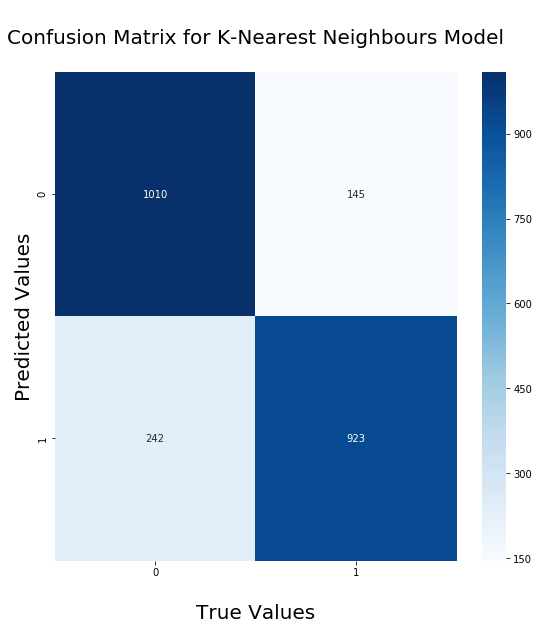

In [142]:
#----- Generate a heat map of the confusion matrix for the K-Nearest Neighbours model
KNN_heatmap = sns.heatmap(KNN_conf_matrix, cmap="Blues", annot=True, fmt="g")
plt.title('\nConfusion Matrix for K-Nearest Neighbours Model\n',size=20)
plt.xlabel('\nTrue Values',size=20)
plt.ylabel('Predicted Values',size=20)

Text(60,0.5,'Predicted Values')

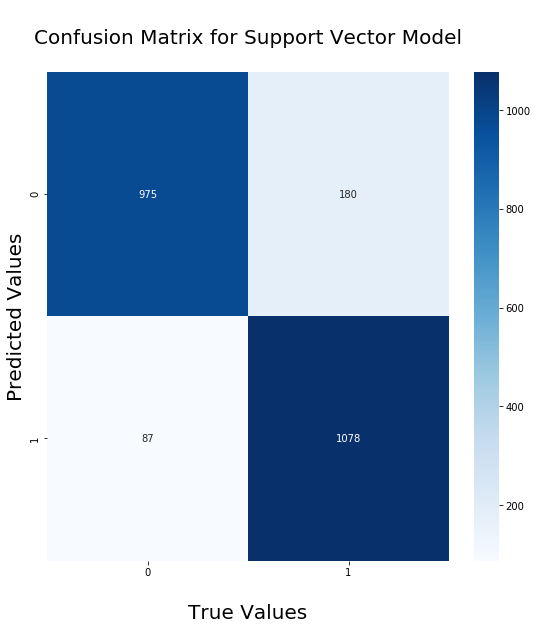

In [143]:
#----- Generate a heat map of the confusion matrix for the Support Vector model
SV_heatmap = sns.heatmap(SV_conf_matrix, cmap="Blues", annot=True, fmt="g")
plt.title('\nConfusion Matrix for Support Vector Model\n',size=20)
plt.xlabel('\nTrue Values',size=20)
plt.ylabel('Predicted Values',size=20)

In [144]:
#----- Compare the Receiver Operating Characteristic (ROC) Curves of All Models

#----- Calculate the true and false positive rates for the models
LR_fpr, LR_tpr, LR_threshholds = roc_curve(y_test, LR_predictions,drop_intermediate=False)
DT_fpr, DT_tpr, DT_threshholds = roc_curve(y_test, DT_predictions, drop_intermediate=False)
KNN_fpr, KNN_tpr, KNN_threshholds = roc_curve(y_test, KNN_predictions)
SV_fpr, SV_tpr, SV_threshholds = metrics.roc_curve(y_test, SV_predictions, drop_intermediate=False)

In [145]:
#----- Calculate the area under the curve for the models
LR_roc_auc = metrics.auc(LR_fpr, LR_tpr)
DT_roc_auc = metrics.auc(DT_fpr, DT_tpr)
KNN_roc_auc = metrics.auc(KNN_fpr, KNN_tpr)
SV_roc_auc = metrics.auc(SV_fpr, SV_tpr)

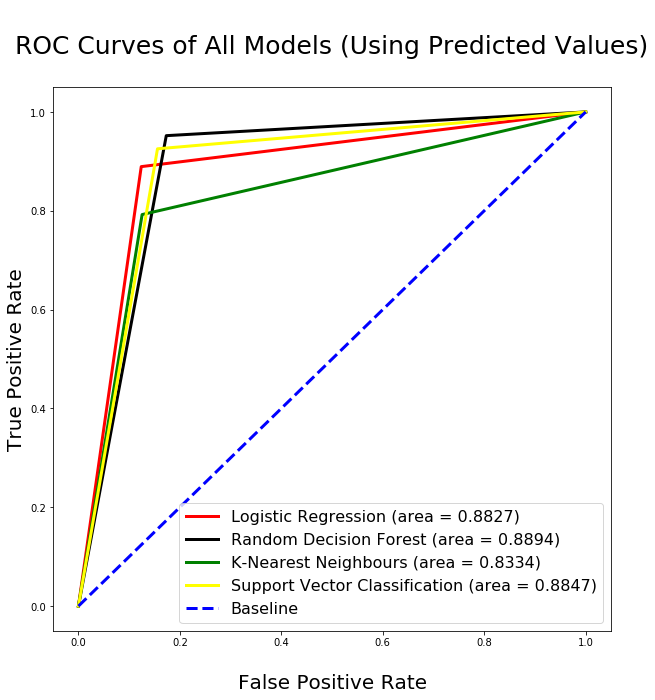

In [146]:
#----- Plot the ROC curves for all models
plt.figure(figsize=(10,10))

#----- Add the ROC Curve for the Logistic Regression to the Graph
LR_line, = plt.plot(LR_fpr, LR_tpr, color='Red', lw=3, label='Logistic Regression (area = %0.4f)' % LR_roc_auc)

#----- Add the ROC Curve for the Random Decision Forest to the Graph
DT_line, = plt.plot(DT_fpr, DT_tpr, color='Black', lw=3, label='Random Decision Forest (area = %0.4f)' % DT_roc_auc)

#----- Add the ROC Curve for the K-Nearest Neighbours to the Graph
KNN_line, = plt.plot(KNN_fpr, KNN_tpr, color='Green', lw=3, label='K-Nearest Neighbours (area = %0.4f)' % KNN_roc_auc)


#----- Add the ROC Curve for the Support Vector Classification model to the Graph
SV_line, = plt.plot(SV_fpr,SV_tpr, color='Yellow',lw=3,label='Support Vector Classification (area = %0.4f)' % SV_roc_auc)

#----- Add the baseline
baseline, = plt.plot([0, 1], [0, 1], color='Blue', lw=3, label='Baseline', linestyle='--')

plt.xlabel('\nFalse Positive Rate',size=20)
plt.ylabel('True Positive Rate', size=20)
plt.title('\nROC Curves of All Models (Using Predicted Values)\n',size=25)
plt.legend(loc="lower right",handles=[LR_line, DT_line, KNN_line, SV_line, baseline], prop={'size': 16})
plt.show()

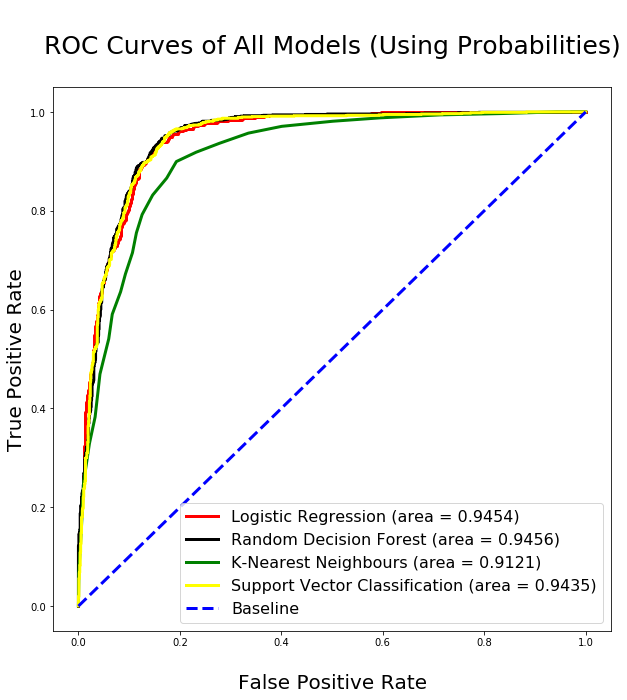

In [147]:
#----- Plot the ROC curves for all models using the probabilities
plt.figure(figsize=(10,10))

#----- Add the ROC Curve for the Logistic Regression to the Graph
LR_y_pred_proba = LR_model.predict_proba(x_test)[:,1]
LR_fpr, LR_tpr, LR_threshholds = metrics.roc_curve(y_test,  LR_y_pred_proba)
LR_roc_auc = metrics.roc_auc_score(y_test, LR_y_pred_proba)
LR_line, = plt.plot(LR_fpr, LR_tpr, color='Red', lw=3, label='Logistic Regression (area = %0.4f)' % LR_roc_auc)

#----- Add the ROC Curve for the Random Decision Forest to the Graph
DT_y_pred_proba = DT_model.predict_proba(x_test)[:,1]
DT_fpr, DT_tpr, DT_threshholds = metrics.roc_curve(y_test,  DT_y_pred_proba)
DT_roc_auc = metrics.roc_auc_score(y_test, DT_y_pred_proba)
DT_line, = plt.plot(DT_fpr,DT_tpr,color='Black', lw=3, label='Random Decision Forest (area = %0.4f)' % DT_roc_auc)

#----- Add the ROC Curve for the K-Nearest Neighbours to the Graph
KNN_y_pred_proba = KNN_model.predict_proba(x_test)[:,1]
KNN_fpr, KNN_tpr, KNN_threshholds = metrics.roc_curve(y_test,  KNN_y_pred_proba)
KNN_roc_auc = metrics.roc_auc_score(y_test, KNN_y_pred_proba)
KNN_line, = plt.plot(KNN_fpr,KNN_tpr,color='Green', lw=3, label='K-Nearest Neighbours (area = %0.4f)' % KNN_roc_auc)

#----- Add the ROC Curve for the Support Vector Classification model to the Graph
SV_y_pred_proba = SV_model.predict_proba(x_test)[:,1]
SV_fpr, SV_tpr, SV_threshholds = metrics.roc_curve(y_test, SV_y_pred_proba)
SV_roc_auc = metrics.roc_auc_score(y_test, SV_y_pred_proba)
SV_line, = plt.plot(SV_fpr,SV_tpr,color='Yellow',lw=3,label='Support Vector Classification (area = %0.4f)' % SV_roc_auc)

#----- Add the baseline
baseline, = plt.plot([0, 1], [0, 1], color='Blue', lw=3, label='Baseline', linestyle='--')

plt.xlabel('\nFalse Positive Rate',size=20)
plt.ylabel('True Positive Rate', size=20)
plt.title('\nROC Curves of All Models (Using Probabilities)\n',size=25)
plt.legend(loc="lower right",handles=[LR_line, DT_line, KNN_line, SV_line, baseline], prop={'size': 16})
plt.show()